# Analysis brief
Your CPO wants to understand the drivers of user retention on Digital Marketing Firm. You need to investigate several hypotheses and present your diagnosis in 10 to 15 slides: where should Digital Marketing Firm invest or what should Digital Marketing Firm fix in order to improve user retention?
Dataset : SF ID, region, tier, vertical, revenue, legacy clicktale

# Questions
1. Is there any specific data cleansing action(s) you would implement before starting the analysis ?
2. Is user retention steady over time?
3. How would you formulate your first hypotheses and how to confirm/infirm them ?
4. Based on your findings, create a deck of 10-15 slides maximum for your CPO &
product managers. Pay attention to the story telling.
5. According to you, are there any specific missing attributes that are worth
monitoring?
6. What actions would you recommend after doing the analysis?

# Comments:
I left the notebook as I worked on it (with improvements and notes and questions)

## Available Data

### Imports

In [790]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as datetime

### Tables

In [791]:
definition = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Definition')
retention_overall = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Retention overall')
retention_by_product = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Retention by product')
user_retention_by_account = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'User retention by account')
geography = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Geography + service')
account_metadata = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Account metadata (ARR, company ')
clicktale_exportfolio = pd.read_excel('/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Data.xlsx', sheet_name = 'Clicktale ex-portfolio')

##### Table 1 : definition

##### Table 2 : retention_overall

In [793]:
retention_overall

first_connection      month       relative_month  \
0    2019-12-01 00:00:00 2019-12-01                  0.0   
1    2019-12-01 00:00:00 2020-01-01                  1.0   
2    2019-12-01 00:00:00 2020-02-01                  2.0   
3    2019-12-01 00:00:00 2020-03-01                  3.0   
4    2019-12-01 00:00:00 2020-04-01                  4.0   
5    2019-12-01 00:00:00 2020-05-01                  5.0   
6    2019-12-01 00:00:00 2020-06-01                  6.0   
7    2019-12-01 00:00:00 2020-07-01                  7.0   
8    2019-12-01 00:00:00 2020-08-01                  8.0   
9    2019-12-01 00:00:00 2020-09-01                  9.0   
10   2019-12-01 00:00:00 2020-10-01                 10.0   
11   2019-12-01 00:00:00 2020-11-01                 11.0   
12   2019-12-01 00:00:00 2020-12-01                 12.0   
13   2019-12-01 00:00:00 2021-01-01                 13.0   
14   2019-12-01 00:00:00 2021-02-01                 14.0   
15   2019-12-01 00:00:00 2021-03-01                 15.0   
16   2019-12-01 00:00:00 2021-04-01                 16.0   
17   2019-12-01 00:00:00 2021-05-01                 17.0   
18   2019-12-01 00:00:00 2021-06-01                 18.0   
19   2019-12-01 00:00:00 2021-07-01                 19.0   
20   2019-12-01 00:00:00 2021-08-01                 20.0   
21   2019-12-01 00:00:00 2021-09-01                 21.0   
22   2019-12-01 00:00:00 2021-10-01                 22.0   
23   2019-12-01 00:00:00 2021-11-01                 23.0   
24   2019-12-01 00:00:00 2021-12-01                 24.0   
25   2019-12-01 00:00:00 2022-01-01                 25.0   
26   2019-12-01 00:00:00 2022-02-01                 26.0   
27   2019-12-01 00:00:00 2022-03-01                 27.0   
28   2020-01-01 00:00:00 2020-01-01                  0.0   
29   2020-01-01 00:00:00 2020-02-01                  1.0   
30   2020-01-01 00:00:00 2020-03-01                  2.0   
31   2020-01-01 00:00:00 2020-04-01                  3.0   
32   2020-01-01 00:00:00 2020-05-01                  4.0   
33   2020-01-01 00:00:00 2020-06-01                  5.0   
34   2020-01-01 00:00:00 2020-07-01                  6.0   
35   2020-01-01 00:00:00 2020-08-01                  7.0   
36   2020-01-01 00:00:00 2020-09-01                  8.0   
37   2020-01-01 00:00:00 2020-10-01                  9.0   
38   2020-01-01 00:00:00 2020-11-01                 10.0   
39   2020-01-01 00:00:00 2020-12-01                 11.0   
40   2020-01-01 00:00:00 2021-01-01                 12.0   
41   2020-01-01 00:00:00 2021-02-01                 13.0   
42   2020-01-01 00:00:00 2021-03-01                 14.0   
43   2020-01-01 00:00:00 2021-04-01                 15.0   
44   2020-01-01 00:00:00 2021-05-01                 16.0   
45   2020-01-01 00:00:00 2021-06-01                 17.0   
46   2020-01-01 00:00:00 2021-07-01                 18.0   
47   2020-01-01 00:00:00 2021-08-01                 19.0   
48   2020-01-01 00:00:00 2021-09-01                 20.0   
49   2020-01-01 00:00:00 2021-10-01                 21.0   
50   2020-01-01 00:00:00 2021-11-01                 22.0   
51   2020-01-01 00:00:00 2021-12-01                 23.0   
52   2020-01-01 00:00:00 2022-01-01                 24.0   
53   2020-01-01 00:00:00 2022-02-01                 25.0   
54   2020-01-01 00:00:00 2022-03-01                 26.0   
55   2020-02-01 00:00:00 2020-02-01                  0.0   
56   2020-02-01 00:00:00 2020-03-01                  1.0   
57   2020-02-01 00:00:00 2020-04-01                  2.0   
58   2020-02-01 00:00:00 2020-05-01                  3.0   
59   2020-02-01 00:00:00 2020-06-01                  4.0   
60   2020-02-01 00:00:00 2020-07-01                  5.0   
61   2020-02-01 00:00:00 2020-08-01                  6.0   
62   2020-02-01 00:00:00 2020-09-01                  7.0   
63   2020-02-01 00:00:00 2020-10-01                  8.0   
64   2020-02-01 00:00:00 2020-11-01                  9.0   
65   2020-02-01 00:00:00 2020-12-01             

# Table retention_overall engineering

## Note: 
There is a shift in the data from 315.

In [794]:
#Visualising head of retention_overall
retention_overall[0:10]

first_connection      month relative_month  total_users_per_month  \
0  2019-12-01 00:00:00 2019-12-01            0.0                  350.0   
1  2019-12-01 00:00:00 2020-01-01            1.0                  318.0   
2  2019-12-01 00:00:00 2020-02-01            2.0                  290.0   
3  2019-12-01 00:00:00 2020-03-01            3.0                  266.0   
4  2019-12-01 00:00:00 2020-04-01            4.0                  176.0   
5  2019-12-01 00:00:00 2020-05-01            5.0                  186.0   
6  2019-12-01 00:00:00 2020-06-01            6.0                  200.0   
7  2019-12-01 00:00:00 2020-07-01            7.0                  194.0   
8  2019-12-01 00:00:00 2020-08-01            8.0                  188.0   
9  2019-12-01 00:00:00 2020-09-01            9.0                  196.0   

   new_users_onboarded_on_first_connection_month  
0                                          350.0  
1                                          350.0  
2                                          350.0  
3                                          350.0  
4                                          350.0  
5                                          350.0  
6                                          350.0  
7                                          350.0  
8                                          350.0  
9                                          350.0

In [795]:
#Visualizing tail of retention_overall
retention_overall[774:778]

first_connection      month       relative_month  total_users_per_month  \
774       CS Digital 2022-01-01  2022-01-01 00:00:00                    0.0   
775       CS Digital 2022-01-01  2022-02-01 00:00:00                    2.0   
776       CS Digital 2022-01-01  2022-03-01 00:00:00                    4.0   
777       CS Digital 2022-02-01  2022-02-01 00:00:00                    0.0   

     new_users_onboarded_on_first_connection_month  
774                                         2116.0  
775                                         1864.0  
776                                         1312.0  
777                                         1694.0

## Note:
Let's analyse what is in the second part of the table.

In [796]:
print('Total_users_per_month should not be at this format \n \n' ,  retention_overall[retention_overall['first_connection'] == 'CS Digital']['total_users_per_month'].unique() , ' This is relative_month')
print('\n \n')
print('That is retention_overall which has decreasing sections, instead of steady blocks \n \n' , retention_overall[retention_overall['first_connection'] == 'CS Digital']['new_users_onboarded_on_first_connection_month'].unique())

Total_users_per_month should not be at this format 
 
 [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58.]  This is relative_month

 

That is retention_overall which has decreasing sections, instead of steady blocks 
 
 [ 806.  492.  412.  362.  354.  298.  244.  224.  266.  230.  226.  252.
  154.  202.  216.  228.  200.  198.  186.  182.  156.  144.  164.  132.
  110.  112.  120.   96.  588.  370.  308.  304.  256.  214.  174.  180.
  172.  130.  140.  166.  146.  126.  118.  128.  116.  100.   78.  512.
  326.  276.  170.  162.  138.   82.  136.  122.   88.  104.  102.   94.
   72.  982.  636.  514.  368.  344.  350.  348.  264.  314.  282.  262.
  280.  290.  254.  192.  150.  152.  988.  666.  428.  434.  388.  332.
  342.  240.  310.  330.  316.  268.  232.  248.  208.  142.  846.  394.
  378.  292.  212.  270.  236.  194.  210.  206.  160.  792.  496.  456.
  386.  334.  352.  204.  234.  284. 1014.  714.  5

In [797]:
#Some values to see formats and types
print(retention_overall.month[0])
print(retention_overall.first_connection[0])
print(retention_overall.relative_month[0])
print(retention_overall.total_users_per_month[0])
print(retention_overall.new_users_onboarded_on_first_connection_month[0])
print(retention_overall.month[774])
print(retention_overall.first_connection[774])
print(retention_overall.relative_month[774])
print(retention_overall.total_users_per_month[774])
print(retention_overall.new_users_onboarded_on_first_connection_month  
[774])
print(retention_overall[773:774])
print(type(retention_overall.first_connection[774]))

2019-12-01 00:00:00
2019-12-01 00:00:00
0.0
350.0
350.0
2022-01-01 00:00:00
CS Digital
2022-01-01 00:00:00
0.0
2116.0
    first_connection      month       relative_month  total_users_per_month  \
773       CS Digital 2021-12-01  2022-03-01 00:00:00                    6.0   

     new_users_onboarded_on_first_connection_month  
773                                          648.0  
<class 'str'>


In [798]:
#Have an idea of the repartition of total_users_per_month
np.sort(retention_overall['total_users_per_month'].unique())

array([0.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.000e+01,
       1.200e+01, 1.400e+01, 1.600e+01, 1.800e+01, 2.000e+01, 2.200e+01,
       2.400e+01, 2.600e+01, 2.800e+01, 3.000e+01, 3.200e+01, 3.400e+01,
       3.600e+01, 3.800e+01, 4.000e+01, 4.200e+01, 4.400e+01, 4.600e+01,
       4.800e+01, 5.000e+01, 5.200e+01, 5.400e+01, 5.600e+01, 5.800e+01,
       9.800e+01, 1.080e+02, 1.160e+02, 1.200e+02, 1.220e+02, 1.240e+02,
       1.280e+02, 1.300e+02, 1.380e+02, 1.420e+02, 1.480e+02, 1.520e+02,
       1.540e+02, 1.600e+02, 1.660e+02, 1.700e+02, 1.720e+02, 1.760e+02,
       1.820e+02, 1.860e+02, 1.880e+02, 1.920e+02, 1.940e+02, 1.960e+02,
       1.980e+02, 2.000e+02, 2.020e+02, 2.040e+02, 2.080e+02, 2.140e+02,
       2.180e+02, 2.240e+02, 2.280e+02, 2.340e+02, 2.360e+02, 2.460e+02,
       2.580e+02, 2.600e+02, 2.620e+02, 2.640e+02, 2.660e+02, 2.700e+02,
       2.760e+02, 2.820e+02, 2.840e+02, 2.880e+02, 2.900e+02, 2.920e+02,
       2.960e+02, 3.020e+02, 3.060e+02, 3.080e+02, 

# Questions raised by looking at the tables
- Why are there two formats in retention_overall
- What does total_users_per_month and new_users_onboarded_on_first_connection_month mean ? And what is the difference between them ?
- What does first_connection_month mean ? 
- Do we have to clean these data ? 

# Answers
- Shift from index 315 in the data, meaning missing new_users_onboarded_on_first_connection_month, but easy to reinstate because it corresponds to the number of users of the first month of connection. This table is partitioned in 0 to around 24 months (1 by 1) for we suppose different starts (to index 314), then in 0 to around 54 months (2 by 2). It represents the retention (otherwise remaining users from the first connection month). 
- We have to shift the data and create the new_users_onboarded_on_first_connection_month for index 315 to the end.
- What could be insteresting in visualizing is the retention curves (see which pattern is more likely and which of those are outside the pattern and that we should adress first)

# Notes:
It is about the same firm, we have a specific for each month, there are new users on board whom we follow during about 20 months. And the operation is repeated every month, hence the various series.

In [799]:
#Vizualising the table for the 315 change
retention_overall[310:319]

first_connection      month       relative_month  \
310  2021-02-01 00:00:00 2021-11-01                  9.0   
311  2021-02-01 00:00:00 2021-12-01                 10.0   
312  2021-02-01 00:00:00 2022-01-01                 11.0   
313  2021-02-01 00:00:00 2022-02-01                 12.0   
314  2021-02-01 00:00:00 2022-03-01                 13.0   
315           CS Digital 2019-10-01  2019-10-01 00:00:00   
316           CS Digital 2019-10-01  2019-11-01 00:00:00   
317           CS Digital 2019-10-01  2019-12-01 00:00:00   
318           CS Digital 2019-10-01  2020-01-01 00:00:00   

     total_users_per_month  new_users_onboarded_on_first_connection_month  
310                  532.0                                         2006.0  
311                  436.0                                         2006.0  
312                  438.0                                         2006.0  
313                  418.0                                         2006.0  
314                  400.0                                         2006.0  
315                    0.0                                          806.0  
316                    2.0                                          492.0  
317                    4.0                                          412.0  
318                    6.0                                          362.0

In [800]:
#Vizualising the table for the 315 change
retention_overall[315:778]

first_connection      month       relative_month  total_users_per_month  \
315       CS Digital 2019-10-01  2019-10-01 00:00:00                    0.0   
316       CS Digital 2019-10-01  2019-11-01 00:00:00                    2.0   
317       CS Digital 2019-10-01  2019-12-01 00:00:00                    4.0   
318       CS Digital 2019-10-01  2020-01-01 00:00:00                    6.0   
319       CS Digital 2019-10-01  2020-02-01 00:00:00                    8.0   
320       CS Digital 2019-10-01  2020-03-01 00:00:00                   10.0   
321       CS Digital 2019-10-01  2020-04-01 00:00:00                   12.0   
322       CS Digital 2019-10-01  2020-05-01 00:00:00                   14.0   
323       CS Digital 2019-10-01  2020-06-01 00:00:00                   16.0   
324       CS Digital 2019-10-01  2020-07-01 00:00:00                   18.0   
325       CS Digital 2019-10-01  2020-08-01 00:00:00                   20.0   
326       CS Digital 2019-10-01  2020-09-01 00:00:00                   22.0   
327       CS Digital 2019-10-01  2020-10-01 00:00:00                   24.0   
328       CS Digital 2019-10-01  2020-11-01 00:00:00                   26.0   
329       CS Digital 2019-10-01  2020-12-01 00:00:00                   28.0   
330       CS Digital 2019-10-01  2021-01-01 00:00:00                   30.0   
331       CS Digital 2019-10-01  2021-02-01 00:00:00                   32.0   
332       CS Digital 2019-10-01  2021-03-01 00:00:00                   34.0   
333       CS Digital 2019-10-01  2021-04-01 00:00:00                   36.0   
334       CS Digital 2019-10-01  2021-05-01 00:00:00                   38.0   
335       CS Digital 2019-10-01  2021-06-01 00:00:00                   40.0   
336       CS Digital 2019-10-01  2021-07-01 00:00:00                   42.0   
337       CS Digital 2019-10-01  2021-08-01 00:00:00                   44.0   
338       CS Digital 2019-10-01  2021-09-01 00:00:00                   46.0   
339       CS Digital 2019-10-01  2021-10-01 00:00:00                   48.0   
340       CS Digital 2019-10-01  2021-11-01 00:00:00                   50.0   
341       CS Digital 2019-10-01  2021-12-01 00:00:00                   52.0   
342       CS Digital 2019-10-01  2022-01-01 00:00:00                   54.0   
343       CS Digital 2019-10-01  2022-02-01 00:00:00                   56.0   
344       CS Digital 2019-10-01  2022-03-01 00:00:00                   58.0   
345       CS Digital 2019-11-01  2019-11-01 00:00:00                    0.0   
346       CS Digital 2019-11-01  2019-12-01 00:00:00                    2.0   
347       CS Digital 2019-11-01  2020-01-01 00:00:00                    4.0   
348       CS Digital 2019-11-01  2020-02-01 00:00:00                    6.0   
349       CS Digital 2019-11-01  2020-03-01 00:00:00                    8.0   
350       CS Digital 2019-11-01  2020-04-01 00:00:00                   10.0   
351       CS Digital 2019-11-01  2020-05-01 00:00:00                   12.0   
352       CS Digital 2019-11-01  2020-06-01 00:00:00                   14.0   
353       CS Digital 2019-11-01  2020-07-01 00:00:00                   16.0   
354       CS Digital 2019-11-01  2020-08-01 00:00:00                   18.0   
355       CS Digital 2019-11-01  2020-09-01 00:00:00                   20.0   
356       CS Digital 2019-11-01  2020-10-01 00:00:00                   22.0   
357       CS Digital 2019-11-01  2020-11-01 00:00:00                   24.0   
358       CS Digital 2019-11-01  2020-12-01 00:00:00                   26.0   
359       CS Digital 2019-11-01  2021-01-01 00:00:00                   28.0   
360       CS Digital 2019-11-01  2021-02-01 00:00:00                   30.0   
361       CS Digital 2019-11-01  2021-03-01 00:00:00                   32.0   
362       CS Digital 2019-11-01  2021-04-01 00:00:00                   34.0   
363       CS Digital 2019-11-01  2021-05-01 00:00:00                   36.0   
364       CS Digital 2019-11-01  2021-06-01 00:00:00  

In [801]:
retention_overall.tail()

first_connection      month       relative_month  total_users_per_month  \
774       CS Digital 2022-01-01  2022-01-01 00:00:00                    0.0   
775       CS Digital 2022-01-01  2022-02-01 00:00:00                    2.0   
776       CS Digital 2022-01-01  2022-03-01 00:00:00                    4.0   
777       CS Digital 2022-02-01  2022-02-01 00:00:00                    0.0   
778       CS Digital 2022-02-01  2022-03-01 00:00:00                    2.0   

     new_users_onboarded_on_first_connection_month  
774                                         2116.0  
775                                         1864.0  
776                                         1312.0  
777                                         1694.0  
778                                         1694.0

In [805]:
#Shift from 315 and fill with the first connection number of users for each firm and divide by 2 relative_month
retention_overall_shifted = retention_overall.copy()
retention_overall_shifted[315:779] = retention_overall_shifted[315:779].shift(axis = 1, periods =-1)
retention_overall_shifted.loc[315:779, 'relative_month'] = retention_overall_shifted.loc[315:779, 'relative_month'].apply(lambda x: x/2)
retention_overall_shifted[310:319]

first_connection      month relative_month  total_users_per_month  \
310  2021-02-01 00:00:00 2021-11-01            9.0                  532.0   
311  2021-02-01 00:00:00 2021-12-01           10.0                  436.0   
312  2021-02-01 00:00:00 2022-01-01           11.0                  438.0   
313  2021-02-01 00:00:00 2022-02-01           12.0                  418.0   
314  2021-02-01 00:00:00 2022-03-01           13.0                  400.0   
315  2019-10-01 00:00:00 2019-10-01            0.0                  806.0   
316  2019-10-01 00:00:00 2019-11-01            1.0                  492.0   
317  2019-10-01 00:00:00 2019-12-01            2.0                  412.0   
318  2019-10-01 00:00:00 2020-01-01            3.0                  362.0   

     new_users_onboarded_on_first_connection_month  
310                                         2006.0  
311                                         2006.0  
312                                         2006.0  
313                                         2006.0  
314                                         2006.0  
315                                            NaN  
316                                            NaN  
317                                            NaN  
318                                            NaN

In [433]:
#Shift from 315 and fill with the first connection number of users for each firm and divide by 2 relative_month
retention_overall_shifted['new_users_onboarded_on_first_connection_month'] \
[retention_overall_shifted['relative_month'] == 0.0] \
= \
retention_overall_shifted['total_users_per_month'] \
[retention_overall_shifted['relative_month'] == 0.0]
retention_overall_shifted['new_users_onboarded_on_first_connection_month'].fillna(method = 'ffill', inplace = True)
retention_overall_shifted[310:319]

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/2927562046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_overall_shifted['new_users_onboarded_on_first_connection_month'] \


first_connection      month relative_month  total_users_per_month  \
310  2021-02-01 00:00:00 2021-11-01            9.0                  532.0   
311  2021-02-01 00:00:00 2021-12-01           10.0                  436.0   
312  2021-02-01 00:00:00 2022-01-01           11.0                  438.0   
313  2021-02-01 00:00:00 2022-02-01           12.0                  418.0   
314  2021-02-01 00:00:00 2022-03-01           13.0                  400.0   
315  2019-10-01 00:00:00 2019-10-01            0.0                  806.0   
316  2019-10-01 00:00:00 2019-11-01            1.0                  492.0   
317  2019-10-01 00:00:00 2019-12-01            2.0                  412.0   
318  2019-10-01 00:00:00 2020-01-01            3.0                  362.0   

     new_users_onboarded_on_first_connection_month  
310                                         2006.0  
311                                         2006.0  
312                                         2006.0  
313                                         2006.0  
314                                         2006.0  
315                                          806.0  
316                                          806.0  
317                                          806.0  
318                                          806.0

In [806]:
retention_overall_shifted['first_connection'] = pd.to_datetime(retention_overall_shifted['first_connection'])

In [807]:
retention_overall_shifted.tail()

first_connection      month relative_month  total_users_per_month  \
774       2022-01-01 2022-01-01            0.0                 2116.0   
775       2022-01-01 2022-02-01            1.0                 1864.0   
776       2022-01-01 2022-03-01            2.0                 1312.0   
777       2022-02-01 2022-02-01            0.0                 1694.0   
778       2022-02-01 2022-03-01            1.0                 1694.0   

     new_users_onboarded_on_first_connection_month  
774                                            NaN  
775                                            NaN  
776                                            NaN  
777                                            NaN  
778                                            NaN

In [808]:
#Build a qualifying column
retention_overall_shifted['connection_plus_new_users'] = retention_overall_shifted['first_connection'].astype(str) \
+ ' ' + \
retention_overall_shifted['new_users_onboarded_on_first_connection_month'].astype(str) 

In [809]:
retention_overall_shifted['connection_plus_new_users']

0       2019-12-01 350.0
1       2019-12-01 350.0
2       2019-12-01 350.0
3       2019-12-01 350.0
4       2019-12-01 350.0
5       2019-12-01 350.0
6       2019-12-01 350.0
7       2019-12-01 350.0
8       2019-12-01 350.0
9       2019-12-01 350.0
10      2019-12-01 350.0
11      2019-12-01 350.0
12      2019-12-01 350.0
13      2019-12-01 350.0
14      2019-12-01 350.0
15      2019-12-01 350.0
16      2019-12-01 350.0
17      2019-12-01 350.0
18      2019-12-01 350.0
19      2019-12-01 350.0
20      2019-12-01 350.0
21      2019-12-01 350.0
22      2019-12-01 350.0
23      2019-12-01 350.0
24      2019-12-01 350.0
25      2019-12-01 350.0
26      2019-12-01 350.0
27      2019-12-01 350.0
28     2020-01-01 3460.0
29     2020-01-01 3460.0
30     2020-01-01 3460.0
31     2020-01-01 3460.0
32     2020-01-01 3460.0
33     2020-01-01 3460.0
34     2020-01-01 3460.0
35     2020-01-01 3460.0
36     2020-01-01 3460.0
37     2020-01-01 3460.0
38     2020-01-01 3460.0
39     2020-01-01 3460.0


In [810]:
#What are the starts of each series of measure
starts = retention_overall_shifted['connection_plus_new_users'].unique()
print("Supposed number of starts  " + str(len(firms)))

Supposed number of starts  44


In [812]:
#Existing start dates for series of measures
starts

array(['2019-12-01 350.0', '2020-01-01 3460.0', '2020-02-01 1650.0',
       '2020-03-01 1192.0', '2020-04-01 1056.0', '2020-05-01 1144.0',
       '2020-06-01 2100.0', '2020-07-01 1924.0', '2020-08-01 1534.0',
       '2020-09-01 1954.0', '2020-10-01 2062.0', '2020-11-01 792.0',
       '2020-12-01 1422.0', '2021-01-01 1940.0', '2021-02-01 2006.0',
       '2019-10-01 nan', '2019-11-01 nan', '2019-12-01 nan',
       '2020-01-01 nan', '2020-02-01 nan', '2020-03-01 nan',
       '2020-04-01 nan', '2020-05-01 nan', '2020-06-01 nan',
       '2020-07-01 nan', '2020-08-01 nan', '2020-09-01 nan',
       '2020-10-01 nan', '2020-11-01 nan', '2020-12-01 nan',
       '2021-01-01 nan', '2021-02-01 nan', '2021-03-01 nan',
       '2021-04-01 nan', '2021-05-01 nan', '2021-06-01 nan',
       '2021-07-01 nan', '2021-08-01 nan', '2021-09-01 nan',
       '2021-10-01 nan', '2021-11-01 nan', '2021-12-01 nan',
       '2022-01-01 nan', '2022-02-01 nan'], dtype=object)

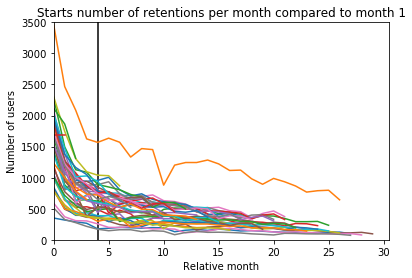

<Figure size 7200x7200 with 0 Axes>

In [813]:
#Plots of retention curves
%matplotlib inline
for i in range(44):
    x = retention_overall_shifted.relative_month[(retention_overall_shifted['connection_plus_new_users'] == starts[i])].to_numpy()
    y = retention_overall_shifted.total_users_per_month[(retention_overall_shifted['connection_plus_new_users'] == starts[i])].to_numpy()
    plt.plot(x,y)
plt.title('Starts number of retentions per month compared to month 1')
plt.xlabel('Relative month')
plt.ylabel('Number of users')
plt.vlines(x=4, ymax =3500, ymin=0)
plt.ylim(bottom=0, top=3500)
plt.xlim(left=0)
plt.figure(figsize=(100, 100))
plt.show(block=False)
# It is possible to use plot for pandas
# It is possible to use canvas to have an interactive figure

# Questions
- How to be sure all the firms have different first_connection_month and that all first relative_month is 0.0 ?
- For homogénéity, try to put the data at the same type
- Better the graph, add graphs and find in other window (qt), find specific firms

# Answers
- One firm is characterized by two numbers (data of first connection and new_users_onboarded_on_first_connection_month (seen when graph was not making a function)/ but we don't know for sure that we don't need another figure

# Questions
- Relative month is doubled from 315. Meaning a step of one month is a step of 2 relative months. Hence it is necessary to divide by two relative month from this stage on.
- All in max 24 months (to check with month)
- missing months or new starts, how many months for a relevant analysis

# Note:
 - General trend is to decrease a lot in the first five months. Quantify it for each firm. Try to find an explanation

In [814]:
#Building a way to see at which month we get 50% decrease
retention_overall_shifted['month_50_decrease'] = 0
for start in starts:
    h = retention_overall_shifted['total_users_per_month'][retention_overall_shifted['connection_plus_new_users']==start].iloc[0]/2
    if len(retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)])>0: 
        m = retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)].iloc[0]
    else:
        m=0
    retention_overall_shifted['month_50_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m
pd.set_option('display.max_row', 800)

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/1827316067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_overall_shifted['month_50_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m


In [815]:
month_50_decrease = pd.DataFrame(retention_overall_shifted.groupby(['month_50_decrease'])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique))

In [816]:
#Starts according to their month of 50% decrease
month_50_decrease

new_users_onboarded_on_first_connection_month
month_50_decrease                                                               
0                                                                          [nan]
1                                                                  [2062.0, nan]
2                  [1192.0, 1422.0, 1534.0, 1650.0, 1954.0, 2006.0, 2100.0, nan]
3                           [792.0, 1056.0, 1144.0, 1924.0, 1940.0, 3460.0, nan]
4                                                                          [nan]
11                                                                       [350.0]

# Notes 
We can see that len(new_users_onboarded_on_first_connection_month) is 44. Hence, on this table the start can be characterized by new_users_onboarded_on_first_connection_month.
On the 24 months monitoring of the advertisement campaign, the number of users decreases by 50% in the first 3 to 5 months.
So, these are the months to focus on to increase retention.

We can remove from part of the analysis the starts that have not completed the process to a certain point

I could have taken other percentages, but the drop in the first months is so important that it is not necessary

In [817]:
retention_overall_shifted['month_25_decrease'] = 0
for start in starts:
    h = retention_overall_shifted['total_users_per_month'][retention_overall_shifted['connection_plus_new_users']==start].iloc[0]*3/4
    if len(retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)])>0: 
        m = retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)].iloc[0]
    else:
        m=0
    retention_overall_shifted['month_25_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m
pd.set_option('display.max_row', 800)

retention_overall_shifted['month_75_decrease'] = 0
for start in starts:
    h = retention_overall_shifted['total_users_per_month'][retention_overall_shifted['connection_plus_new_users']==start].iloc[0]/4
    if len(retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)])>0: 
        m = retention_overall_shifted['relative_month'][(retention_overall_shifted['connection_plus_new_users']==start) & (retention_overall_shifted['total_users_per_month'] < h)].iloc[0]
    else:
        m=0
    retention_overall_shifted['month_75_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m
pd.set_option('display.max_row', 800)

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/750086113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_overall_shifted['month_25_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/750086113.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_overall_shifted['month_75_decrease'][retention_overall_shifted['connection_plus_new_users']==start] = m


In [818]:
month_25_decrease= pd.DataFrame(retention_overall_shifted.groupby(['month_25_decrease'])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique))
month_75_decrease = pd.DataFrame(retention_overall_shifted.groupby(['month_75_decrease'])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique))

In [819]:
month_75_decrease

new_users_onboarded_on_first_connection_month
month_75_decrease                                              
0                                                  [350.0, nan]
3                                                      [1534.0]
4                                                 [1924.0, nan]
5                                                 [2100.0, nan]
7                                                      [1056.0]
8                                                      [1192.0]
9                                                 [1650.0, nan]
10                                                [2006.0, nan]
11                                                        [nan]
12                                                [1422.0, nan]
13                                         [792.0, 2062.0, nan]
14                                                     [1940.0]
15                                                [1954.0, nan]
17                                                        [nan]
18                                                        [nan]
19                                                [1144.0, nan]
23                                                     [3460.0]

In [820]:
month_25_decrease

new_users_onboarded_on_first_connection_month
month_25_decrease                                                                                                                      
0                                                                                                                                 [nan]
1                  [792.0, 1056.0, 1144.0, 1192.0, 1422.0, 1534.0, 1650.0, 1924.0, 1940.0, 1954.0, 2006.0, 2062.0, 2100.0, 3460.0, nan]
2                                                                                                                                 [nan]
4                                                                                                                               [350.0]

## Note:
Decreased by 25 percent mostly in the first 2 months.

Text(0.5, 1.0, 'Repartition of starts according to new users on-board at month 1')

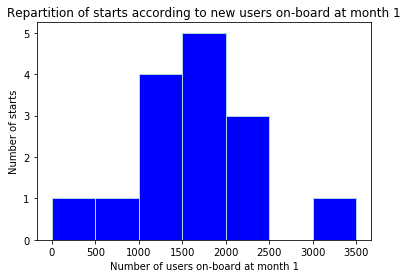

In [821]:
#Repartition of starts in size / pie chart
f = retention_overall_shifted.new_users_onboarded_on_first_connection_month.unique().astype(int)
f.sort()
f
a = range(0, int(max(f)/1000 + 1)*1000, 500)
plt.hist(f, a, color = 'blue', edgecolor = 'lightblue')
plt.xlabel('Number of users on-board at month 1')
plt.ylabel('Number of starts')
plt.title('Repartition of starts according to new users on-board at month 1')

/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  fill = (histtype == 'stepfilled')
/Users/sarahlenet/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  


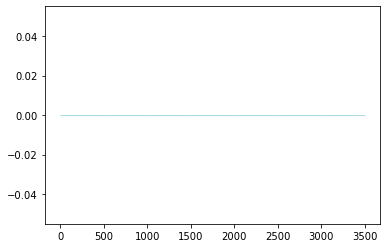

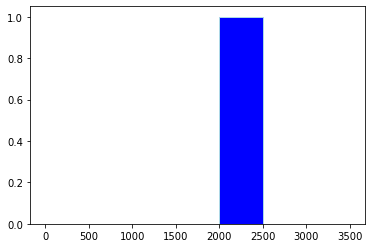

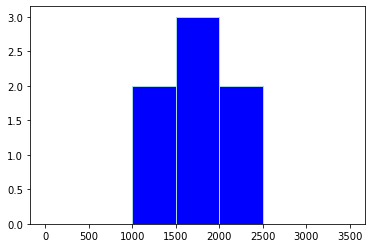

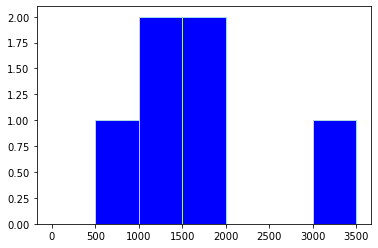

In [822]:
x = month_50_decrease.iloc[0].to_numpy()[0]
plt.hist(x, a, color = 'blue', edgecolor = 'lightblue')
plt.show()
x = month_50_decrease.iloc[1].to_numpy()[0]
plt.hist(x, a, color = 'blue', edgecolor = 'lightblue')
plt.show()
x = month_50_decrease.iloc[2].to_numpy()[0]
plt.hist(x, a, color = 'blue', edgecolor = 'lightblue')
plt.show()
x = month_50_decrease.iloc[3].to_numpy()[0]
plt.hist(x, a, color = 'blue', edgecolor = 'lightblue')
plt.show()

### Comment
There is no particular distribution for month 1,2,3 and 4 (50% decrease) according to the size of the starts

##### Table 3 : retention_by_product

In [823]:
retention_by_product

product first_connection      month  relative_month  \
0     Digital       2017-12-01 2017-12-01             0.0   
1     Digital       2017-12-01 2018-01-01             1.0   
2     Digital       2017-12-01 2018-02-01             2.0   
3     Digital       2017-12-01 2018-03-01             3.0   
4     Digital       2017-12-01 2018-04-01             4.0   
...       ...              ...        ...             ...   
2562   CS App       2022-01-01 2022-02-01             1.0   
2563   CS App       2022-01-01 2022-03-01             2.0   
2564   CS App       2022-02-01 2022-02-01             0.0   
2565   CS App       2022-02-01 2022-03-01             1.0   
2566   CS App       2022-03-01 2022-03-01             0.0   

      total_users_per_month  new_users_onboarded_on_first_connection_month  
0                     326.0                                          326.0  
1                     220.0                                          326.0  
2                     196.0                                          326.0  
3                     170.0                                          326.0  
4                     168.0                                          326.0  
...                     ...                                            ...  
2562                   54.0                                          126.0  
2563                   26.0                                          126.0  
2564                  164.0                                          164.0  
2565                   42.0                                          164.0  
2566                  138.0                                          138.0  

[2567 rows x 6 columns]

In [824]:
product = retention_by_product['product'].unique()
product

array(['Digital', 'Emerch', 'Find & Fix', 'Insight', 'CS App'],
      dtype=object)

# Note:
- Unless starts are really identified by first_connection_month, we don't know if there is a direct link (key) to retention_overall

In [825]:
x = retention_by_product['product'].unique()
retention_by_product['connection_plus_new'] = retention_by_product['first_connection'].apply(str) + retention_by_product['new_users_onboarded_on_first_connection_month'].apply(str)
y = retention_by_product.groupby(['product', 'connection_plus_new']).sum()


In [826]:
repartition_by_product = pd.DataFrame(columns = ['product', 'number_of_starts'])
for p in product:
    d = pd.DataFrame({'product': [p], 'number_of_starts' : [len(y.loc[p])]})
    repartition_by_product = pd.concat([repartition_by_product, d])
repartition_by_product


product number_of_starts
0     Digital               52
0      Emerch               22
0  Find & Fix               21
0     Insight               23
0      CS App               45

# Note:
There is not a specific type of product that is more present then the others

In [827]:
starts = retention_by_product['first_connection'].unique()

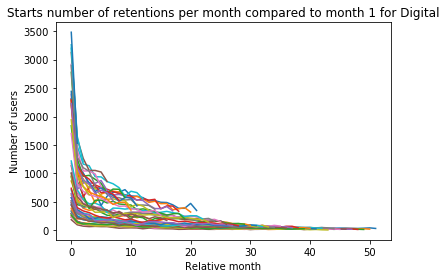

<Figure size 7200x7200 with 0 Axes>

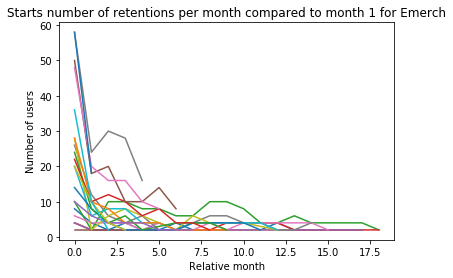

<Figure size 7200x7200 with 0 Axes>

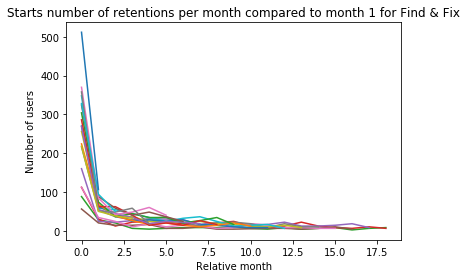

<Figure size 7200x7200 with 0 Axes>

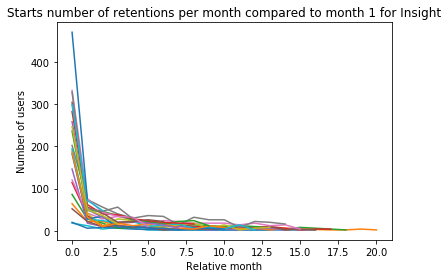

<Figure size 7200x7200 with 0 Axes>

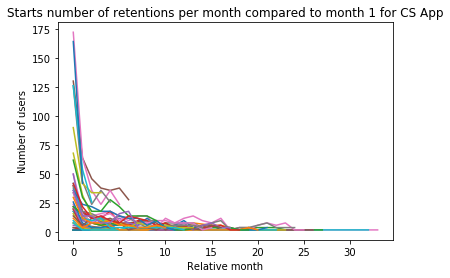

<Figure size 7200x7200 with 0 Axes>

In [828]:
%matplotlib inline
for p in product:
    for start in starts:
        x = retention_by_product.relative_month[(retention_by_product['product'] == p)&(retention_by_product['first_connection'] == start)].to_numpy()
        y = retention_by_product.total_users_per_month[(retention_by_product['product'] == p)&(retention_by_product['first_connection'] == start)].to_numpy()
        plt.plot(x,y)
        string_p = str(p)
    plt.title('Starts number of retentions per month compared to month 1 for ' + string_p)
    plt.xlabel('Relative month')
    plt.ylabel('Number of users')
    #plt.vlines(x=4, ymax =3500, ymin=0)
    #plt.ylim(bottom=0, top=3500)
    #plt.xlim(left=0)
    plt.figure(figsize=(100, 100))
    plt.show(block=False)
# It is possible to use plot

In [829]:
retention_by_product['month_50_decrease'] = 0
i = 0
for p in product:
    for start in starts:
        i = i +1
        hi = retention_by_product['total_users_per_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)].reset_index(drop = True)
        if len(hi) > 0:
            h = hi.iloc[0]/2
            if len(retention_by_product['relative_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start) & (retention_by_product['total_users_per_month'] < h)])>0: 
                m = retention_by_product['relative_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start) & (retention_by_product['total_users_per_month'] < h)].iloc[0]
            else:
                m=0
            retention_by_product['month_50_decrease'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)] = m
pd.set_option('display.max_row', 800)

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/831844344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_by_product['month_50_decrease'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)] = m


In [830]:
retention_by_product['month_50_decrease'] 

0       5
1       5
2       5
3       5
4       5
       ..
2562    1
2563    1
2564    1
2565    1
2566    0
Name: month_50_decrease, Length: 2567, dtype: int64

In [831]:
month_50_decrease = pd.DataFrame(columns = ['product', 'month_50_decrease'])
for p in product:
    m = pd.DataFrame({'product': p, 'month_50_decrease': retention_by_product[retention_by_product['product']==p].groupby(['month_50_decrease'])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique)})
    print(m)
    month_50_decrease = pd.concat([month_50_decrease,m ])
month_50_decrease

                   product  \
month_50_decrease            
0                  Digital   
1                  Digital   
2                  Digital   
3                  Digital   
4                  Digital   
5                  Digital   

                                                                                                                                                                                 month_50_decrease  
month_50_decrease                                                                                                                                                                                   
0                                                                                                                                                                                         [2294.0]  
1                                     [268.0, 296.0, 442.0, 940.0, 1012.0, 1700.0, 1838.0, 1942.0, 2192.0, 2228.0, 2290.0, 2304.0, 2314.0, 2388.0, 2442.0, 2778.0, 2898.

product  \
0     Digital   
1     Digital   
2     Digital   
3     Digital   
4     Digital   
5     Digital   
0      Emerch   
1      Emerch   
2      Emerch   
4      Emerch   
0  Find & Fix   
1  Find & Fix   
0     Insight   
1     Insight   
2     Insight   
0      CS App   
1      CS App   
2      CS App   
5      CS App   

                                                                                                                                                                 month_50_decrease  
0                                                                                                                                                                         [2294.0]  
1                     [268.0, 296.0, 442.0, 940.0, 1012.0, 1700.0, 1838.0, 1942.0, 2192.0, 2228.0, 2290.0, 2304.0, 2314.0, 2388.0, 2442.0, 2778.0, 2898.0, 2916.0, 3262.0, 3482.0]  
2  [186.0, 232.0, 236.0, 266.0, 290.0, 292.0, 446.0, 474.0, 514.0, 520.0, 618.0, 644.0, 710.0, 738.0, 866.0, 958.0, 998.0, 1134.0, 1176.0, 1218.0, 2214.0, 2290.0, 3126.0, 3200.0]  
3                                                                                                                                                            [386.0, 490.0, 572.0]  
4                                                                                                                                                                          [352.0]  
5                                                                                                                                                                          [326.0]  
0                                                                                                                                                                 [2.0, 4.0, 46.0]  
1                                                                                                                     [10.0, 20.0, 22.0, 24.0, 26.0, 28.0, 36.0, 48.0, 50.0, 58.0]  
2                                                                                                                                                          [8.0, 10.0, 14.0, 20.0]  
4                                                                                                                                                                            [6.0]  
0                                                                                                                                                                     [2.0, 300.0]  
1                                                     [56.0, 88.0, 112.0, 160.0, 216.0, 218.0, 224.0, 256.0, 268.0, 270.0, 286.0, 304.0, 324.0, 328.0, 348.0, 358.0, 370.0, 512.0]  
0                                                                                                                                                                          [254.0]  
1                                  [20.0, 52.0, 64.0, 86.0, 114.0, 120.0, 146.0, 182.0, 186.0, 190.0, 194.0, 202.0, 236.0, 246.0, 258.0, 282.0, 298.0, 304.0, 328.0, 332.0, 470.0]  
2                                                                                                                                                                           [18.0]  
0                                                                                                                                                                [2.0, 4.0, 138.0]  
1                              [8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 30.0, 34.0, 36.0, 38.0, 40.0, 42.0, 50.0, 62.0, 68.0, 90.0, 126.0, 130.0, 164.0, 172.0]  
2                                                                                                                                                     [6.0, 8.0, 18.0, 22.0, 42.0]  
5                                                                                                                                                                [8.0, 20.0, 36.0]

In [832]:
month_50_decrease['month_50_decrease_n_starts'] = month_50_decrease['month_50_decrease'].apply(len)

In [833]:
month_50_decrease['month_50_decrease_n_starts'] = month_50_decrease['month_50_decrease'].apply(len)
month_50_decrease['total_number_starts_product'] = 0
for p in product:
    month_50_decrease['total_number_starts_product'][month_50_decrease['product'] == p] = repartition_by_product['number_of_starts'][repartition_by_product['product'] == p].loc[0]

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/4228068906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_50_decrease['total_number_starts_product'][month_50_decrease['product'] == p] = repartition_by_product['number_of_starts'][repartition_by_product['product'] == p].loc[0]


In [834]:
month_50_decrease

product  \
0     Digital   
1     Digital   
2     Digital   
3     Digital   
4     Digital   
5     Digital   
0      Emerch   
1      Emerch   
2      Emerch   
4      Emerch   
0  Find & Fix   
1  Find & Fix   
0     Insight   
1     Insight   
2     Insight   
0      CS App   
1      CS App   
2      CS App   
5      CS App   

                                                                                                                                                                 month_50_decrease  \
0                                                                                                                                                                         [2294.0]   
1                     [268.0, 296.0, 442.0, 940.0, 1012.0, 1700.0, 1838.0, 1942.0, 2192.0, 2228.0, 2290.0, 2304.0, 2314.0, 2388.0, 2442.0, 2778.0, 2898.0, 2916.0, 3262.0, 3482.0]   
2  [186.0, 232.0, 236.0, 266.0, 290.0, 292.0, 446.0, 474.0, 514.0, 520.0, 618.0, 644.0, 710.0, 738.0, 866.0, 958.0, 998.0, 1134.0, 1176.0, 1218.0, 2214.0, 2290.0, 3126.0, 3200.0]   
3                                                                                                                                                            [386.0, 490.0, 572.0]   
4                                                                                                                                                                          [352.0]   
5                                                                                                                                                                          [326.0]   
0                                                                                                                                                                 [2.0, 4.0, 46.0]   
1                                                                                                                     [10.0, 20.0, 22.0, 24.0, 26.0, 28.0, 36.0, 48.0, 50.0, 58.0]   
2                                                                                                                                                          [8.0, 10.0, 14.0, 20.0]   
4                                                                                                                                                                            [6.0]   
0                                                                                                                                                                     [2.0, 300.0]   
1                                                     [56.0, 88.0, 112.0, 160.0, 216.0, 218.0, 224.0, 256.0, 268.0, 270.0, 286.0, 304.0, 324.0, 328.0, 348.0, 358.0, 370.0, 512.0]   
0                                                                                                                                                                          [254.0]   
1                                  [20.0, 52.0, 64.0, 86.0, 114.0, 120.0, 146.0, 182.0, 186.0, 190.0, 194.0, 202.0, 236.0, 246.0, 258.0, 282.0, 298.0, 304.0, 328.0, 332.0, 470.0]   
2                                                                                                                                                                           [18.0]   
0                                                                                                                                                                [2.0, 4.0, 138.0]   
1                              [8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 30.0, 34.0, 36.0, 38.0, 40.0, 42.0, 50.0, 62.0, 68.0, 90.0, 126.0, 130.0, 164.0, 172.0]   
2                                                                                                                                                     [6.0, 8.0, 18.0, 22.0, 42.0]   
5                                                                                                                                                                [8.0, 20.0, 36.0]   

   month_50_decrease_n_s

# 

# 

In [835]:
user_retention_by_account

first_connection               account_id     months  relative_month  \
0           2022-02-01       0012o00002a2ekwAAA 2022-03-01             1.0   
1           2022-02-01       0012o00002a2ekwAAA 2022-02-01             0.0   
2           2021-11-01       0012o00002a2ekwAAA 2022-03-01             4.0   
3           2021-11-01       0012o00002a2ekwAAA 2022-02-01             3.0   
4           2021-11-01       0012o00002a2ekwAAA 2022-01-01             2.0   
...                ...                      ...        ...             ...   
81055       2018-11-01  demo_account_or_partner 2019-08-01             9.0   
81056       2018-11-01  demo_account_or_partner 2019-07-01             8.0   
81057       2018-11-01  demo_account_or_partner 2019-06-01             7.0   
81058       2018-11-01  demo_account_or_partner 2019-05-01             6.0   
81059       2018-11-01  demo_account_or_partner 2019-04-01             5.0   

       total_users_per_month  new_users_onboarded_on_first_connection_month  
0                        4.0                                            8.0  
1                        8.0                                            8.0  
2                        2.0                                            2.0  
3                        2.0                                            2.0  
4                        2.0                                            2.0  
...                      ...                                            ...  
81055                    2.0                                            6.0  
81056                    4.0                                            6.0  
81057                    2.0                                            6.0  
81058                    2.0                                            6.0  
81059                    2.0                                            6.0  

[81060 rows x 6 columns]

In [836]:
starts = user_retention_by_account['first_connection'].unique()
users = user_retention_by_account['account_id'].unique()

In [542]:
user_retention_and_metadata = pd.merge(account_metadata, user_retention_by_account, on = 'account_id')


In [ ]:
%matplotlib inline
for user in users:
    for start in starts:
        x = user_retention_by_account.relative_month[(user_retention_by_account['account_id'] == user)&(user_retention_by_account['first_connection'] == start)].to_numpy()
        y = user_retention_by_account.total_users_per_month[(user_retention_by_account['account_id'] == user)&(user_retention_by_account['first_connection'] == start)].to_numpy()
        plt.plot(x,y)   
plt.xlabel('Relative month')
plt.ylabel('Number of users')
    #plt.vlines(x=4, ymax =3500, ymin=0)
    #plt.ylim(bottom=0, top=3500)
    #plt.xlim(left=0)
plt.figure(figsize=(100, 100))
plt.show(block=False)
# It is possible to use plot

In [841]:
#join between user and metadata in order to link accounts to clients' metadata
user_retention_and_metadata

account_id industry high level  ARR_total  ARR_total.1  \
0      00157000020XsBpAAK               Telco  5077328.0     15231984   
1      00157000020XsBpAAK               Telco  5077328.0     15231984   
2      00157000020XsBpAAK               Telco  5077328.0     15231984   
3      00157000020XsBpAAK               Telco  5077328.0     15231984   
4      00157000020XsBpAAK               Telco  5077328.0     15231984   
...                   ...                 ...        ...          ...   
72046  001D000001YaZ3TIAV              Retail        NaN            0   
72047  001D000001YaZ3TIAV              Retail        NaN            0   
72048  0012o00002ybn5aAAA                BFSI    61152.0       183456   
72049  0012o00002ybn5aAAA                BFSI    61152.0       183456   
72050  0012o00002ybn5aAAA                BFSI    61152.0       183456   

      High level revenue tier Employee tier first_connection     months  \
0                  Enterprise    Enterprise       2022-03-01 2022-03-01   
1                  Enterprise    Enterprise       2022-02-01 2022-03-01   
2                  Enterprise    Enterprise       2022-02-01 2022-02-01   
3                  Enterprise    Enterprise       2022-01-01 2022-03-01   
4                  Enterprise    Enterprise       2022-01-01 2022-02-01   
...                       ...           ...              ...        ...   
72046                 Unknown    Mid-market       2020-01-01 2020-03-01   
72047                 Unknown    Mid-market       2020-01-01 2020-01-01   
72048              Mid-market    Mid-market       2021-10-01 2022-03-01   
72049              Mid-market    Mid-market       2021-10-01 2021-11-01   
72050              Mid-market    Mid-market       2021-10-01 2021-10-01   

       relative_month  total_users_per_month  \
0                 0.0                  220.0   
1                 1.0                   94.0   
2                 0.0                  182.0   
3                 2.0                   40.0   
4                 1.0                   50.0   
...               ...                    ...   
72046             2.0                    2.0   
72047             0.0                    4.0   
72048             5.0                    2.0   
72049             1.0                    2.0   
72050             0.0                    8.0   

       new_users_onboarded_on_first_connection_month  
0                                              220.0  
1                                              182.0  
2                                              182.0  
3                                              116.0  
4                                              116.0  
...                                              ...  
72046                                            4.0  
72047                                            4.0  
72048                                            8.0  
72049                                            8.0  
72050                                            8.0  

[72051 rows x 11 columns]

In [842]:
user_retention_and_metadata['Employee tier'].unique()

array(['Enterprise', 'Mid-market', 'SMB'], dtype=object)

In [843]:
HL_revenue = user_retention_and_metadata['High level revenue tier'].unique()
HL_revenue

array(['Enterprise', 'Unknown', 'Mid-market', 'SMB'], dtype=object)

In [844]:
industry = user_retention_and_metadata['industry high level'].unique()
industry

array(['Telco', 'B2B', 'BFSI', 'Retail', 'Media / Entertainment',
       'Others', 'Automotive', 'Travel'], dtype=object)

### Note:
- we do the same thing as for products with industry high level and then with High level revenue tier 
and then with ARR_Total
- for full joins and joins explain the stats of user_id left out

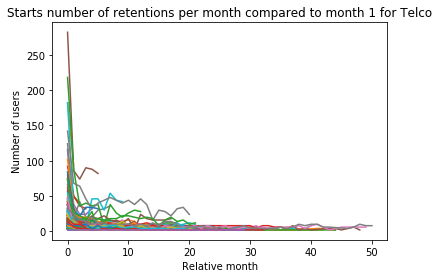

<Figure size 7200x7200 with 0 Axes>

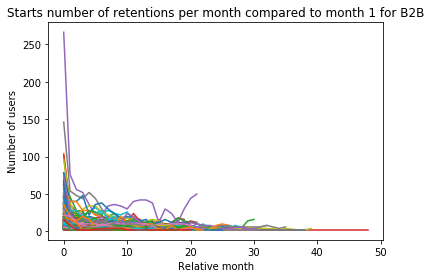

<Figure size 7200x7200 with 0 Axes>

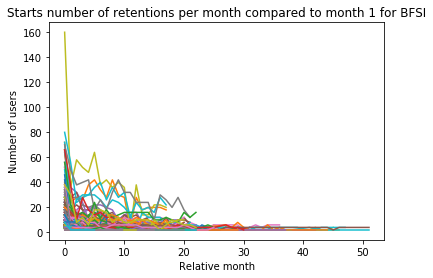

<Figure size 7200x7200 with 0 Axes>

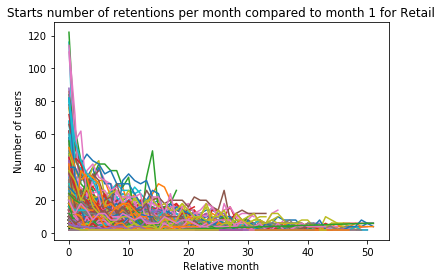

<Figure size 7200x7200 with 0 Axes>

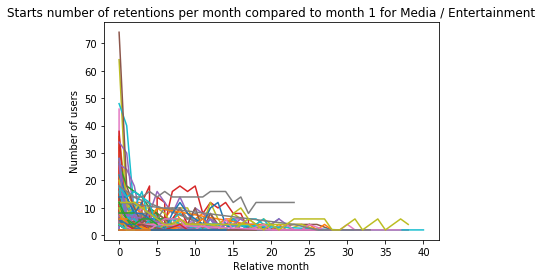

<Figure size 7200x7200 with 0 Axes>

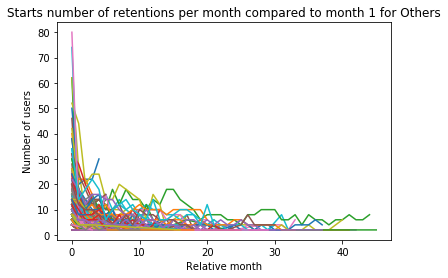

<Figure size 7200x7200 with 0 Axes>

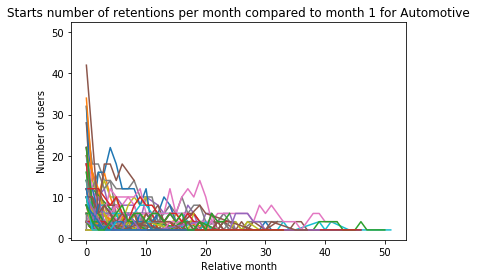

<Figure size 7200x7200 with 0 Axes>

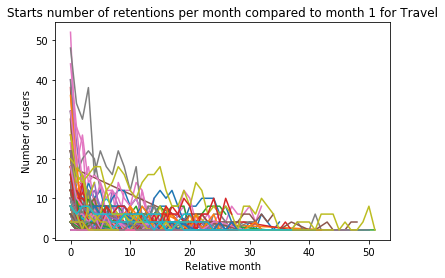

<Figure size 7200x7200 with 0 Axes>

In [609]:
%matplotlib inline
account_id = user_retention_and_metadata['account_id'].unique()#.remove('demo_account_or_partner')
for ind in industry:
    for key in account_id:
        starts = user_retention_and_metadata[user_retention_and_metadata['account_id'] == key]['first_connection'].unique()
        for start in starts:
            x = user_retention_and_metadata.relative_month[(user_retention_and_metadata['account_id'] == key)&(user_retention_and_metadata['industry high level'] == ind)&(user_retention_and_metadata['first_connection'] == start)].to_numpy()
            y = user_retention_and_metadata.total_users_per_month[(user_retention_and_metadata['account_id'] == key)&(user_retention_and_metadata['industry high level'] == ind)&(user_retention_and_metadata['first_connection'] == start)].to_numpy()
            plt.plot(x,y)
            string_ind = str(ind)
    plt.title('Starts number of retentions per month compared to month 1 for ' + string_ind)
    plt.xlabel('Relative month')
    plt.ylabel('Number of users')
    #plt.vlines(x=4, ymax =3500, ymin=0)
    #plt.ylim(bottom=0, top=3500)
    #plt.xlim(left=0)
    plt.figure(figsize=(100, 100))
    plt.show(block=False)
# It is possible to use plot

# Note:
    - There is a pie chart to make with the different industries
    - Might want to see particular values (should be decreasing unless some users come back from month to month)
    - See the case for retail
    - Periodicity in travel and automotive

In [845]:
diff_industries = user_retention_and_metadata.groupby('industry high level').count()

In [846]:
diff_industries

account_id  ARR_total  ARR_total.1  \
industry high level                                         
Automotive                   2367       2367         2367   
B2B                          7133       6893         7133   
BFSI                         7218       7059         7218   
Media / Entertainment        2047       2016         2047   
Others                       4556       4500         4556   
Retail                      38231      36375        38231   
Telco                        4502       4454         4502   
Travel                       5997       5893         5997   

                       High level revenue tier  Employee tier  \
industry high level                                             
Automotive                                2367           2367   
B2B                                       7133           7133   
BFSI                                      7218           7218   
Media / Entertainment                     2047           2047   
Others                                    4556           4556   
Retail                                   38231          38231   
Telco                                     4502           4502   
Travel                                    5997           5997   

                       first_connection  months  relative_month  \
industry high level                                               
Automotive                         2367    2367            2367   
B2B                                7133    7133            7133   
BFSI                               7218    7218            7218   
Media / Entertainment              2047    2047            2047   
Others                             4556    4556            4556   
Retail                            38231   38231           38231   
Telco                              4502    4502            4502   
Travel                             5997    5997            5997   

                       total_users_per_month  \
industry high level                            
Automotive                              2367   
B2B                                     7133   
BFSI                                    7218   
Media / Entertainment                   2047   
Others                                  4556   
Retail                                 38231   
Telco                                   4502   
Travel                                  5997   

                       new_users_onboarded_on_first_connection_month  
industry high level                                                   
Automotive                                                      2367  
B2B                                                             7133  
BFSI                                                            7218  
Media / Entertainment                                           2047  
Others                                                          4556  
Retail                                                         38231  
Telco                                                           4502  
Travel                                                          5997

Text(0, 0.5, '')

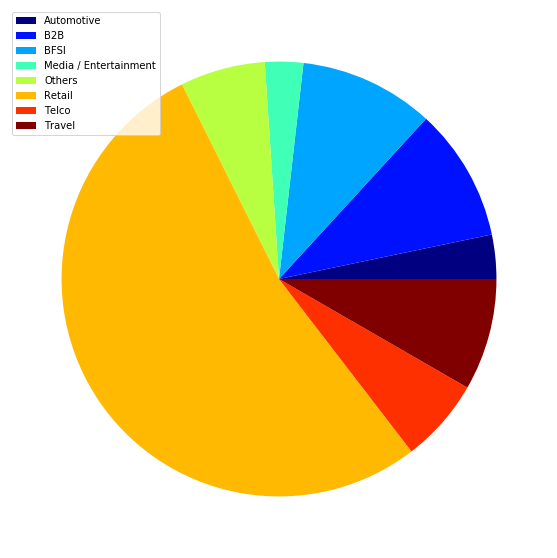

In [620]:
diff_industries.plot.pie(y = 'account_id', figsize = (10,10), cmap = 'jet', labels=None,)
plt.ylabel('')

In [847]:
geo_meta = pd.merge(geography, account_metadata, on = "account_id")

In [848]:
geo_accounts = geography['account_id'].unique()
meta_accounts = account_metadata['account_id'].unique()

In [849]:
geo_accounts[np.in1d(geo_accounts, meta_accounts)]

array([], dtype=object)

# Note:
- connect with metadata, client's industry and geography
- We can do the same thing as we did for the other tables: 50% decrease categorizing in ARR or in industry type or enmployee tier
- for geography as well and service category

In [537]:
geography

account_id owner_entity service_category
0     0012o00002XBxEL       Israel           0 - 5%
1     0012o00002dk82o      Nordics          5 - 10%
2     0012o00002sYNE9         APAC           0 - 5%
3     0012o000035SDkC       Israel           0 - 5%
4     00157000021SSk8           US           0 - 5%
...               ...          ...              ...
1297  001D0000015MrWu       France         10 - 15%
1298  001D000001aWmgl       France          5 - 10%
1299  0015700001nKjzS       France             >25%
1300  0015700001r0BXH           UK           0 - 5%
1301  0015700002Iu01V           UK         15 - 20%

[1302 rows x 3 columns]

In [539]:
geography.sort_values(by= "account_id")

account_id owner_entity service_category
999   0012o00002IxFe1           UK          5 - 10%
529   0012o00002IxNAC         DACH         15 - 20%
1068  0012o00002IxQYi           US          5 - 10%
688   0012o00002Iy9UI           US          5 - 10%
83    0012o00002IyVfZ       France         15 - 20%
...               ...          ...              ...
465   001D000001gHlS2       France             >25%
621   001D000001hDCwL       France         15 - 20%
888   001D000001iCoBw       France          5 - 10%
1147  001D000001j28lU       France         15 - 20%
654   001D000001kowyG       France           0 - 5%

[1302 rows x 3 columns]

In [531]:
print(type(geography['account_id'][0]))


<class 'str'>


In [566]:
def resize_id(x):
    size = len(x)
    mod_string = x[:size - 3]
    return mod_string

# Merging tables

In [567]:
account_metadata_trunc = account_metadata.copy()
account_metadata_trunc['account_id'] = account_metadata_trunc['account_id'].apply(lambda x: resize_id(x))

In [568]:
account_metadata_trunc['account_id']

0      00157000020XsBp
1      0015700002E5qkB
2      00157000023DUUM
3      00157000020Y7vk
4      0012o00002Rd6Vt
            ...       
875    0012o00002aVpJp
876    0015700002AhPPb
877    00157000024WooX
878    001D000001YaZ3T
879    0012o00002ybn5a
Name: account_id, Length: 880, dtype: object

In [569]:
user_retention_by_account_trunc = user_retention_by_account.copy()
user_retention_by_account_trunc['account_id'] = user_retention_by_account['account_id'].apply(lambda x: resize_id(x))

In [570]:
user_retention_and_metadata_trunc = user_retention_and_metadata.copy()
user_retention_and_metadata_trunc['account_id'] = user_retention_and_metadata['account_id'].apply(lambda x: resize_id(x))

In [9]:
account_metadata


account_id industry high level  ARR_total  ARR_total.1  \
0    00157000020XsBpAAK               Telco  5077328.0     15231984   
1    0015700002E5qkBAAR                 B2B   164399.0       493197   
2    00157000023DUUMAA4                BFSI  1980000.0      5940000   
3    00157000020Y7vkAAC               Telco  1241600.0      3724800   
4    0012o00002Rd6VtAAJ                 B2B   947236.0      2841708   
..                  ...                 ...        ...          ...   
875  0012o00002aVpJpAAK              Retail    69498.0       208494   
876  0015700002AhPPbAAN              Travel    68824.0       206472   
877  00157000024WooXAAS                 B2B    30000.0        90000   
878  001D000001YaZ3TIAV              Retail        NaN            0   
879  0012o00002ybn5aAAA                BFSI    61152.0       183456   

    High level revenue tier Employee tier  
0                Enterprise    Enterprise  
1                Enterprise    Enterprise  
2                Enterprise    Enterprise  
3                Enterprise    Enterprise  
4                Enterprise    Enterprise  
..                      ...           ...  
875              Mid-market    Mid-market  
876              Mid-market    Mid-market  
877              Mid-market    Mid-market  
878                 Unknown    Mid-market  
879              Mid-market    Mid-market  

[880 rows x 6 columns]

In [571]:
user_metadata_geo = pd.merge(user_retention_and_metadata_trunc, geography, on = 'account_id')

In [624]:
countries = geography['owner_entity'].unique()

In [643]:
demo_account_or_partner = user_metadata_geo[user_metadata_geo['account_id'] == 'demo_account_or_partner']
print(len(demo_account_or_partner))

0


In [649]:
user_metadata_geo

account_id industry high level  ARR_total  ARR_total.1  \
0      00157000020XsBp               Telco  5077328.0     15231984   
1      00157000020XsBp               Telco  5077328.0     15231984   
2      00157000020XsBp               Telco  5077328.0     15231984   
3      00157000020XsBp               Telco  5077328.0     15231984   
4      00157000020XsBp               Telco  5077328.0     15231984   
...                ...                 ...        ...          ...   
71232  001D000001YaZ3T              Retail        NaN            0   
71233  001D000001YaZ3T              Retail        NaN            0   
71234  0012o00002ybn5a                BFSI    61152.0       183456   
71235  0012o00002ybn5a                BFSI    61152.0       183456   
71236  0012o00002ybn5a                BFSI    61152.0       183456   

      High level revenue tier Employee tier first_connection     months  \
0                  Enterprise    Enterprise       2022-03-01 2022-03-01   
1                  Enterprise    Enterprise       2022-02-01 2022-03-01   
2                  Enterprise    Enterprise       2022-02-01 2022-02-01   
3                  Enterprise    Enterprise       2022-01-01 2022-03-01   
4                  Enterprise    Enterprise       2022-01-01 2022-02-01   
...                       ...           ...              ...        ...   
71232                 Unknown    Mid-market       2020-01-01 2020-03-01   
71233                 Unknown    Mid-market       2020-01-01 2020-01-01   
71234              Mid-market    Mid-market       2021-10-01 2022-03-01   
71235              Mid-market    Mid-market       2021-10-01 2021-11-01   
71236              Mid-market    Mid-market       2021-10-01 2021-10-01   

       relative_month  total_users_per_month  \
0                 0.0                  220.0   
1                 1.0                   94.0   
2                 0.0                  182.0   
3                 2.0                   40.0   
4                 1.0                   50.0   
...               ...                    ...   
71232             2.0                    2.0   
71233             0.0                    4.0   
71234             5.0                    2.0   
71235             1.0                    2.0   
71236             0.0                    8.0   

       new_users_onboarded_on_first_connection_month owner_entity  \
0                                              220.0           US   
1                                              182.0           US   
2                                              182.0           US   
3                                              116.0           US   
4                                              116.0           US   
...                                              ...          ...   
71232                                            4.0        Italy   
71233                                            4.0        Italy   
71234                                            8.0           US   
71235                                            8.0           US   
71236                                            8.0           US   

      service_category  
0               0 - 5%  
1               0 - 5%  
2               0 - 5%  
3               0 - 5%  
4               0 - 5%  
...                ...  
71232         15 - 20%  
71233         15 - 20%  
71234           0 - 5%  
71235           0 - 5%  
71236           0 - 5%  

[71237 rows x 13 columns]

In [663]:
user_metadata_geo[user_metadata_geo['owner_entity'] == 'Italy']['account_id']

4344     00157000026qit6
4345     00157000026qit6
4346     00157000026qit6
4347     00157000026qit6
4348     00157000026qit6
              ...       
71229    001D000001YaZ3T
71230    001D000001YaZ3T
71231    001D000001YaZ3T
71232    001D000001YaZ3T
71233    001D000001YaZ3T
Name: account_id, Length: 1929, dtype: object

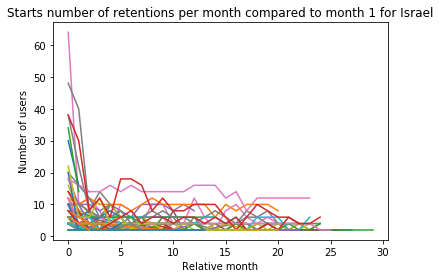

<Figure size 7200x7200 with 0 Axes>

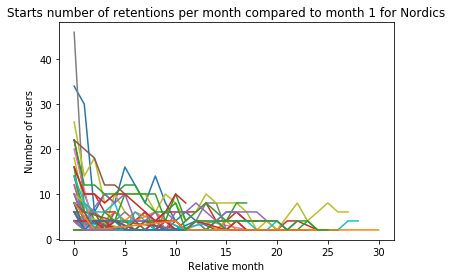

<Figure size 7200x7200 with 0 Axes>

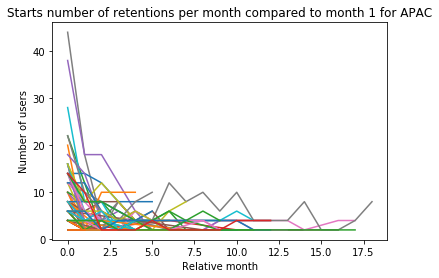

<Figure size 7200x7200 with 0 Axes>

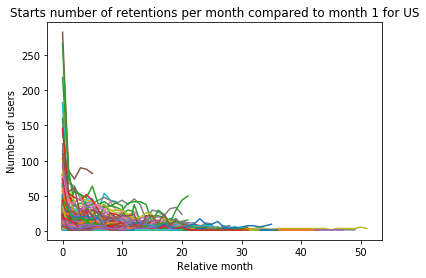

<Figure size 7200x7200 with 0 Axes>

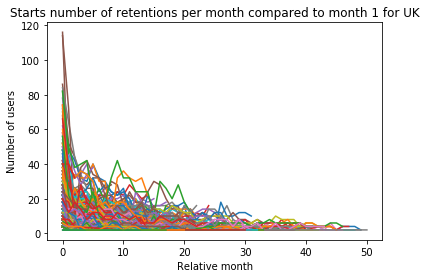

<Figure size 7200x7200 with 0 Axes>

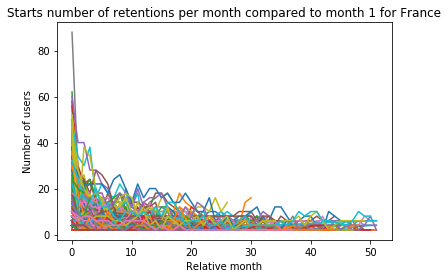

<Figure size 7200x7200 with 0 Axes>

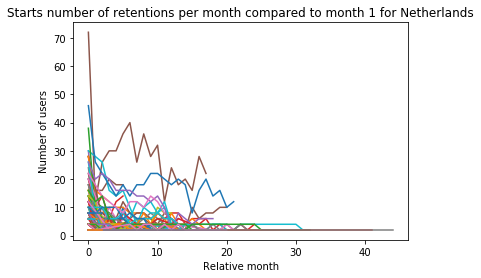

<Figure size 7200x7200 with 0 Axes>

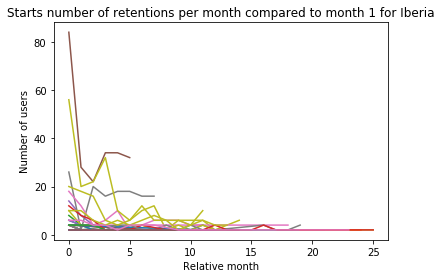

<Figure size 7200x7200 with 0 Axes>

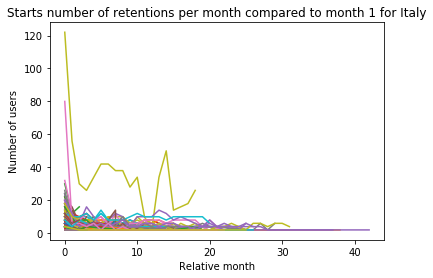

<Figure size 7200x7200 with 0 Axes>

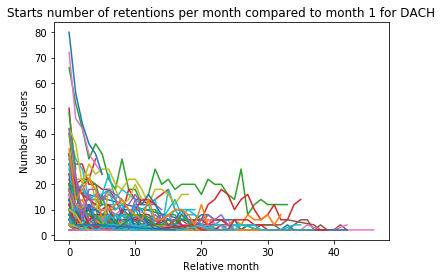

<Figure size 7200x7200 with 0 Axes>

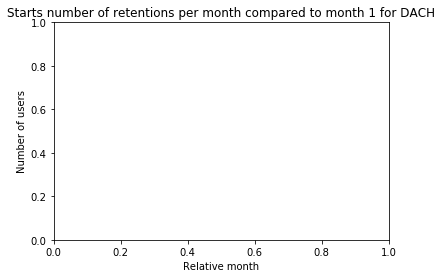

<Figure size 7200x7200 with 0 Axes>

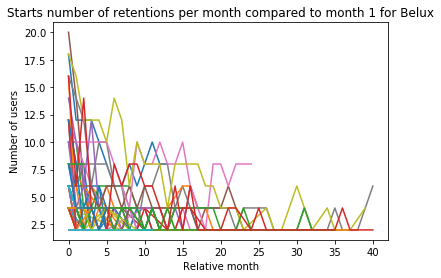

<Figure size 7200x7200 with 0 Axes>

In [656]:
%matplotlib inline
for country in countries:
    account_ids_countries = user_metadata_geo[user_metadata_geo['owner_entity'] == country]['account_id'].unique()
    for key in account_ids_countries:
        starts = user_metadata_geo[user_metadata_geo['account_id'] == key]['first_connection'].unique()
        for start in starts:
            x = user_metadata_geo.relative_month[(user_metadata_geo['account_id'] == key)&(user_metadata_geo['owner_entity'] == country)&(user_metadata_geo['first_connection'] == start)].to_numpy()
            y = user_metadata_geo.total_users_per_month[(user_metadata_geo['account_id'] == key)&(user_metadata_geo['owner_entity'] == country)&(user_metadata_geo['first_connection'] == start)].to_numpy()
            if (len(x) != 0) & (len(y) != 0) :
                plt.plot(x,y)
                string_country = str(country)
    plt.title('Starts number of retentions per month compared to month 1 for ' + string_country)
    plt.xlabel('Relative month')
    plt.ylabel('Number of users')
    #plt.vlines(x=4, ymax =3500, ymin=0)
    #plt.ylim(bottom=0, top=3500)
    #plt.xlim(left=0)
    plt.figure(figsize=(100, 100))
    plt.show(block=False)
    plt.savefig('/Users/sarahlenet/Documents/Candidatures\ Postes/Digital Marketing Firm/Material for Slides/Countries/' + string_country)
## It is possible to use plot

In [572]:
user_metadata_geo

account_id industry high level  ARR_total  ARR_total.1  \
0      00157000020XsBp               Telco  5077328.0     15231984   
1      00157000020XsBp               Telco  5077328.0     15231984   
2      00157000020XsBp               Telco  5077328.0     15231984   
3      00157000020XsBp               Telco  5077328.0     15231984   
4      00157000020XsBp               Telco  5077328.0     15231984   
...                ...                 ...        ...          ...   
71232  001D000001YaZ3T              Retail        NaN            0   
71233  001D000001YaZ3T              Retail        NaN            0   
71234  0012o00002ybn5a                BFSI    61152.0       183456   
71235  0012o00002ybn5a                BFSI    61152.0       183456   
71236  0012o00002ybn5a                BFSI    61152.0       183456   

      High level revenue tier Employee tier first_connection     months  \
0                  Enterprise    Enterprise       2022-03-01 2022-03-01   
1                  Enterprise    Enterprise       2022-02-01 2022-03-01   
2                  Enterprise    Enterprise       2022-02-01 2022-02-01   
3                  Enterprise    Enterprise       2022-01-01 2022-03-01   
4                  Enterprise    Enterprise       2022-01-01 2022-02-01   
...                       ...           ...              ...        ...   
71232                 Unknown    Mid-market       2020-01-01 2020-03-01   
71233                 Unknown    Mid-market       2020-01-01 2020-01-01   
71234              Mid-market    Mid-market       2021-10-01 2022-03-01   
71235              Mid-market    Mid-market       2021-10-01 2021-11-01   
71236              Mid-market    Mid-market       2021-10-01 2021-10-01   

       relative_month  total_users_per_month  \
0                 0.0                  220.0   
1                 1.0                   94.0   
2                 0.0                  182.0   
3                 2.0                   40.0   
4                 1.0                   50.0   
...               ...                    ...   
71232             2.0                    2.0   
71233             0.0                    4.0   
71234             5.0                    2.0   
71235             1.0                    2.0   
71236             0.0                    8.0   

       new_users_onboarded_on_first_connection_month owner_entity  \
0                                              220.0           US   
1                                              182.0           US   
2                                              182.0           US   
3                                              116.0           US   
4                                              116.0           US   
...                                              ...          ...   
71232                                            4.0        Italy   
71233                                            4.0        Italy   
71234                                            8.0           US   
71235                                            8.0           US   
71236                                            8.0           US   

      service_category  
0               0 - 5%  
1               0 - 5%  
2               0 - 5%  
3               0 - 5%  
4               0 - 5%  
...                ...  
71232         15 - 20%  
71233         15 - 20%  
71234           0 - 5%  
71235           0 - 5%  
71236           0 - 5%  

[71237 rows x 13 columns]

In [573]:
l1 = len(user_metadata_geo['account_id'].unique())
l2 = len(geography['account_id'].unique())
l3 = len(user_retention_by_account['account_id'].unique())
l4 = len(account_metadata['account_id'].unique())

In [575]:
print("Number of ids in user_metadata_geo ", l1)
print("Number of ids in geography ", l2)
print("Number of ids in user_retention_by_account ", l3)
print("Number of ids in account_metadata ", l4)

Number of ids in user_metadata_geo  804
Number of ids in geography  1302
Number of ids in user_retention_by_account  1032
Number of ids in account_metadata  880


# Questions
- check this as if it were for a huge database and that you can't know for sure

In [587]:
checks_account_ids = pd.merge(user_retention_by_account_trunc, geography, how='outer', on = 'account_id', indicator = True)

In [588]:
checks_account_ids

first_connection       account_id     months  relative_month  \
0           2022-02-01  0012o00002a2ekw 2022-03-01             1.0   
1           2022-02-01  0012o00002a2ekw 2022-02-01             0.0   
2           2021-11-01  0012o00002a2ekw 2022-03-01             4.0   
3           2021-11-01  0012o00002a2ekw 2022-02-01             3.0   
4           2021-11-01  0012o00002a2ekw 2022-01-01             2.0   
...                ...              ...        ...             ...   
81392              NaT  00157000029Oc3Q        NaT             NaN   
81393              NaT  001D000001ZhG3p        NaT             NaN   
81394              NaT  0015700001nKjzS        NaT             NaN   
81395              NaT  0015700001r0BXH        NaT             NaN   
81396              NaT  0015700002Iu01V        NaT             NaN   

       total_users_per_month  new_users_onboarded_on_first_connection_month  \
0                        4.0                                            8.0   
1                        8.0                                            8.0   
2                        2.0                                            2.0   
3                        2.0                                            2.0   
4                        2.0                                            2.0   
...                      ...                                            ...   
81392                    NaN                                            NaN   
81393                    NaN                                            NaN   
81394                    NaN                                            NaN   
81395                    NaN                                            NaN   
81396                    NaN                                            NaN   

      owner_entity service_category      _merge  
0               US           0 - 5%        both  
1               US           0 - 5%        both  
2               US           0 - 5%        both  
3               US           0 - 5%        both  
4               US           0 - 5%        both  
...            ...              ...         ...  
81392       France           0 - 5%  right_only  
81393       France           0 - 5%  right_only  
81394       France             >25%  right_only  
81395           UK           0 - 5%  right_only  
81396           UK         15 - 20%  right_only  

[81397 rows x 9 columns]

In [591]:
len(checks_account_ids[checks_account_ids['_merge'].isin(['left_only'])]["account_id"].unique())

67

In [636]:
checks_account_ids_all = checks_account_ids.copy()
checks_account_ids_all.rename(columns = {'_merge' : 'first_merge'}, inplace = True)

In [637]:
checks_account_ids_all = pd.merge(checks_account_ids_all, account_metadata_trunc, how='outer', on = 'account_id', indicator = True)

In [638]:
checks_account_ids_all

first_connection       account_id     months  relative_month  \
0           2022-02-01  0012o00002a2ekw 2022-03-01             1.0   
1           2022-02-01  0012o00002a2ekw 2022-02-01             0.0   
2           2021-11-01  0012o00002a2ekw 2022-03-01             4.0   
3           2021-11-01  0012o00002a2ekw 2022-02-01             3.0   
4           2021-11-01  0012o00002a2ekw 2022-01-01             2.0   
...                ...              ...        ...             ...   
81401              NaT  0015700002C0ZDm        NaT             NaN   
81402              NaT  0012o00002JNyxX        NaT             NaN   
81403              NaT  0017T000007SWIw        NaT             NaN   
81404              NaT  001D0000015NnYV        NaT             NaN   
81405              NaT  0015700002GUaUU        NaT             NaN   

       total_users_per_month  new_users_onboarded_on_first_connection_month  \
0                        4.0                                            8.0   
1                        8.0                                            8.0   
2                        2.0                                            2.0   
3                        2.0                                            2.0   
4                        2.0                                            2.0   
...                      ...                                            ...   
81401                    NaN                                            NaN   
81402                    NaN                                            NaN   
81403                    NaN                                            NaN   
81404                    NaN                                            NaN   
81405                    NaN                                            NaN   

      owner_entity service_category first_merge industry high level  \
0               US           0 - 5%        both                BFSI   
1               US           0 - 5%        both                BFSI   
2               US           0 - 5%        both                BFSI   
3               US           0 - 5%        both                BFSI   
4               US           0 - 5%        both                BFSI   
...            ...              ...         ...                 ...   
81401          NaN              NaN         NaN          Automotive   
81402          NaN              NaN         NaN                 B2B   
81403          NaN              NaN         NaN              Retail   
81404          NaN              NaN         NaN          Automotive   
81405          NaN              NaN         NaN              Retail   

       ARR_total  ARR_total.1 High level revenue tier Employee tier  \
0        44000.0     132000.0              Mid-market    Mid-market   
1        44000.0     132000.0              Mid-market    Mid-market   
2        44000.0     132000.0              Mid-market    Mid-market   
3        44000.0     132000.0              Mid-market    Mid-market   
4        44000.0     132000.0              Mid-market    Mid-market   
...          ...          ...                     ...           ...   
81401        NaN          0.0              Mid-market    Mid-market   
81402        NaN          0.0              Enterprise    Enterprise   
81403        NaN          0.0                 Unknown    Mid-market   
81404        NaN          0.0              Enterprise    Enterprise   
81405        NaN          0.0              Mid-market    Mid-market   

           _merge  
0            both  
1            both  
2            both  
3            both  
4            both  
...           ...  
81401  right_only  
81402  right_only  
81403  right_only  
81404  right_only  
81405  right_only  

[81406 rows x 15 columns]

In [642]:
len(checks_account_ids_all[checks_account_ids_all['_merge'] == 'both']['account_id'].unique())

871

### Note:
- 67 right_only
- 337 left_only
- Ecrire une fonction qui permette de tracer les graphes joints et disjoints et une fonction qui permette de 
trouver les 50 / 25 et 75 pourcents
- service % gives an idea of how much of the contract for the client is professional based (contract value what are the parts other than professional ?)
- Slides et ipython notebook to clean and work presentation
- rebound of emerch
- geography and service category

Text(0, 0.5, '')

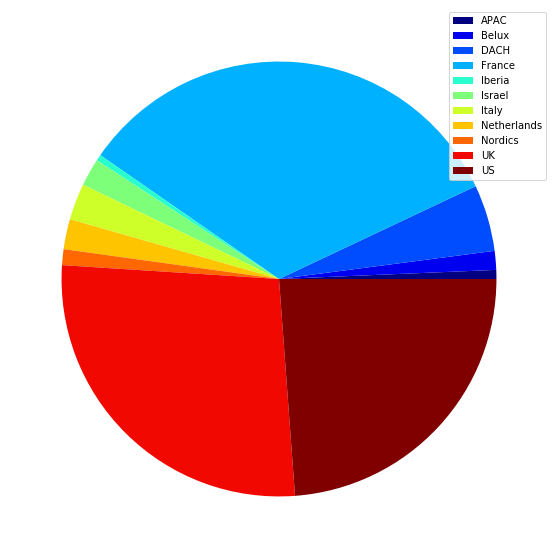

In [627]:
diff_countries = user_metadata_geo.groupby('owner_entity').count()
diff_countries.plot.pie(y = 'account_id', figsize = (10,10), cmap = 'jet', labels=None,)
plt.ylabel('')

In [777]:
%matplotlib inline
def plot_per_category(df, category, path):
    categories = df[category].unique()
    for cat in categories:
        account_ids_category = df[df[category] == cat]['account_id'].unique()
        for key in account_ids_category:
            starts = df[df['account_id'] == key]['first_connection'].unique()
            for start in starts:
                x = df.relative_month[(df['account_id'] == key)&(df[category] == cat)&(df['first_connection'] == start)].to_numpy()
                y = df.total_users_per_month[(df['account_id'] == key)&(df[category] == cat)&(df['first_connection'] == start)].to_numpy()
                if (len(x) != 0) & (len(y) != 0) :
                    plt.plot(x,y)
        string_category = str(cat)
        fig = plt.gcf()
        plt.title('Starts number of retentions per month compared to month 1 for ' + string_category)
        plt.xlabel('Relative month')
        plt.ylabel('Number of users')
        plt.show(block=False)
        plt.draw()
        fig.savefig(path + str(cat))
        


In [ ]:
path = '/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Material for Slides/Countries/'
plot_per_category(user_metadata_geo, 'owner_entity', path)


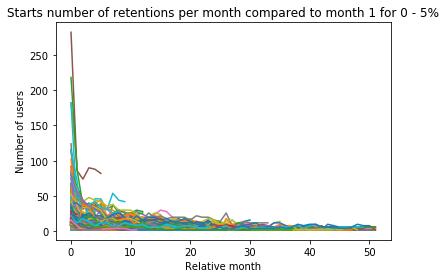

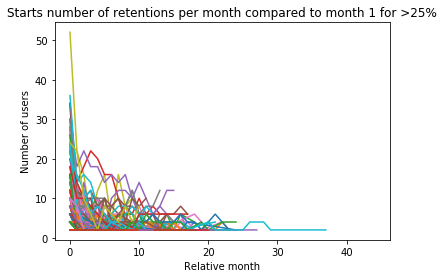

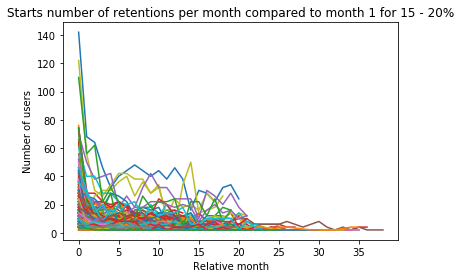

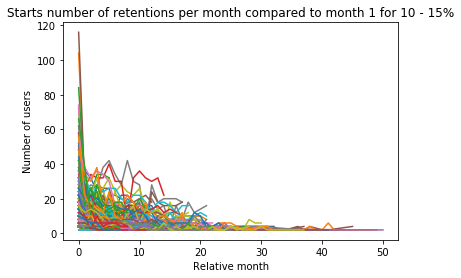

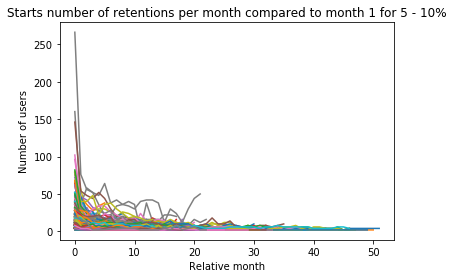

<Figure size 432x288 with 0 Axes>

In [701]:
path = '/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Material for Slides/Service/'
plot_per_category(user_metadata_geo, 'service_category', path)


# Note:
- Functions to automate the previous findings

In [734]:
def retention_percent(df, percent, category):
    
    
    column = 'month_' + str(percent) +'_decrease'
    df[column] = 0
    i = 0
    categories = df[category].unique()
    
    df['connection_plus_new'] = 0
    df['connection_plus_new'] = df['first_connection'].apply(str) + df['new_users_onboarded_on_first_connection_month'].apply(str)
    why = df.groupby([category, 'connection_plus_new']).sum()
    repartition_by_category = pd.DataFrame(columns = [category, 'number_of_starts'])
    for cat in categories:
        d = pd.DataFrame({category: [cat], 'number_of_starts' : [len(why.loc[cat])]})
        repartition_by_category = pd.concat([repartition_by_category, d])
    
    for cat in categories:
        start = df[df[category] == cat]['first_connection'].unique()
        for start in starts:
            i = i +1
            hi = df['total_users_per_month'][(df[category]==cat) & (df['first_connection']==start)].reset_index(drop = True)
            if len(hi) > 0:
                h = hi.iloc[0]*(100-percent)/100
                if (len(df[(df[category]==cat) & (df['first_connection']==start) & (df['total_users_per_month'] < h)]['relative_month'])>0): 
                    m = df[(df[category]==cat) & (df['first_connection']==start) & (df['total_users_per_month'] < h)]['relative_month'].iloc[0]
                else:
                    m=0
                df[column][(df[category]==cat) & (df['first_connection']==start)] = m

    
    stats = pd.DataFrame(columns = [category, column])
   
    for cat in categories:
        m = pd.DataFrame({category: cat, column: df[df[category]==cat].groupby([column])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique)})
        stats = pd.concat([stats,m ])
        
    name = column + '_n_starts'
    stats[name] = stats[column].apply(len)
    
    stats['total_number_starts'] = 0
    
    
    for cat in categories:
        stats['total_number_starts'][stats[category] == cat] = repartition_by_category['number_of_starts'][repartition_by_category[category] == cat].loc[0]
    return stats
retention_percent(retention_by_product, 50, 'product')


/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][(df[category]==cat) & (df['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['total_number_starts'][stats[category] == cat] = repartition_by_category['number_of_starts'][repartition_by_category[category] == cat].loc[0]


product  \
0     Digital   
1     Digital   
2     Digital   
0      Emerch   
1      Emerch   
0  Find & Fix   
1  Find & Fix   
0     Insight   
1     Insight   
0      CS App   
1      CS App   

                                                                                                                                                                                                                                                                                                                                                month_50_decrease  \
0  [186.0, 232.0, 236.0, 266.0, 268.0, 290.0, 292.0, 296.0, 326.0, 352.0, 386.0, 442.0, 446.0, 474.0, 490.0, 514.0, 520.0, 572.0, 618.0, 644.0, 710.0, 738.0, 866.0, 940.0, 958.0, 998.0, 1012.0, 1134.0, 1176.0, 1218.0, 1700.0, 1838.0, 1942.0, 2192.0, 2214.0, 2228.0, 2290.0, 2294.0, 2304.0, 2314.0, 2388.0, 2442.0, 2778.0, 2898.0, 2916.0, 3126.0, 3262.0]   
1                                                                                                                                                                                                                                                                                                                                                        [3482.0]   
2                                                                                                                                                                                                                                                                                                                                                        [3200.0]   
0                                                                                                                                                                                                                                                                          [2.0, 4.0, 6.0, 8.0, 10.0, 14.0, 20.0, 22.0, 24.0, 26.0, 28.0, 46.0, 48.0, 50.0, 58.0]   
1                                                                                                                                                                                                                                                                                                                                                    [36.0, 58.0]   
0                                                                                                                                                                                                                                      [2.0, 56.0, 88.0, 112.0, 160.0, 216.0, 218.0, 224.0, 256.0, 268.0, 270.0, 286.0, 300.0, 304.0, 324.0, 348.0, 358.0, 370.0]   
1                                                                                                                                                                                                                                                                                                                                                  [328.0, 512.0]   
0                                                                                                                                                                                                                  [18.0, 20.0, 52.0, 64.0, 86.0, 114.0, 120.0, 146.0, 182.0, 186.0, 190.0, 194.0, 202.0, 236.0, 246.0, 254.0, 258.0, 282.0, 304.0, 328.0, 332.0]   
1                                                                                                                                                                                                                                                                                                                                                  [298.0, 470.0]   
0                                                                                                                                                                                              [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 1

In [722]:
retention_by_product['connection_plus_new'] = retention_by_product['first_connection'].apply(str) + retention_by_product['new_users_onboarded_on_first_connection_month'].apply(str)
y = retention_by_product.groupby(['product', 'connection_plus_new']).sum()
repartition_by_product = pd.DataFrame(columns = ['product', 'number_of_starts'])
for p in product:
    d = pd.DataFrame({'product': [p], 'number_of_starts' : [len(y.loc[p])]})
    repartition_by_product = pd.concat([repartition_by_product, d])
repartition_by_product

retention_by_product['month_50_decrease'] = 0
i = 0
for p in product:
    for start in starts:
        i = i +1
        hi = retention_by_product['total_users_per_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)].reset_index(drop = True)
        if len(hi) > 0:
            h = hi.iloc[0]/2
            if len(retention_by_product['relative_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start) & (retention_by_product['total_users_per_month'] < h)])>0: 
                m = retention_by_product['relative_month'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start) & (retention_by_product['total_users_per_month'] < h)].iloc[0]
            else:
                m=0
            retention_by_product['month_50_decrease'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)] = m

month_50_decrease = pd.DataFrame(columns = ['product', 'month_50_decrease'])
for p in product:
    m = pd.DataFrame({'product': p, 'month_50_decrease': retention_by_product[retention_by_product['product']==p].groupby(['month_50_decrease'])['new_users_onboarded_on_first_connection_month'].apply(list).apply(np.unique)})
    print(m)
    month_50_decrease = pd.concat([month_50_decrease,m ])
month_50_decrease['month_50_decrease_n_starts'] = month_50_decrease['month_50_decrease'].apply(len)
month_50_decrease['total_number_starts_product'] = 0
for p in product:
    month_50_decrease['total_number_starts_product'][month_50_decrease['product'] == p] = repartition_by_product['number_of_starts'][repartition_by_product['product'] == p].loc[0]
month_50_decrease



                   product  \
month_50_decrease            
0                  Digital   
1                  Digital   
2                  Digital   

                                                                                                                                                                                                                                                                                                                                                                month_50_decrease  
month_50_decrease                                                                                                                                                                                                                                                                                                                                                                  
0                  [186.0, 232.0, 236.0, 266.0, 268.0, 290.0, 292.0, 296.0, 326.0, 352.0, 386.0, 442.0, 4

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/2051768451.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_by_product['month_50_decrease'][(retention_by_product['product']==p) & (retention_by_product['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/2051768451.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_50_decrease['total_number_starts_product'][month_50_decrease['product'] == p] = repartition_by_product['number_of_starts'][repartition_by_product['product'] == p].loc[0]


product  \
0     Digital   
1     Digital   
2     Digital   
0      Emerch   
1      Emerch   
0  Find & Fix   
1  Find & Fix   
0     Insight   
1     Insight   
0      CS App   
1      CS App   

                                                                                                                                                                                                                                                                                                                                                month_50_decrease  \
0  [186.0, 232.0, 236.0, 266.0, 268.0, 290.0, 292.0, 296.0, 326.0, 352.0, 386.0, 442.0, 446.0, 474.0, 490.0, 514.0, 520.0, 572.0, 618.0, 644.0, 710.0, 738.0, 866.0, 940.0, 958.0, 998.0, 1012.0, 1134.0, 1176.0, 1218.0, 1700.0, 1838.0, 1942.0, 2192.0, 2214.0, 2228.0, 2290.0, 2294.0, 2304.0, 2314.0, 2388.0, 2442.0, 2778.0, 2898.0, 2916.0, 3126.0, 3262.0]   
1                                                                                                                                                                                                                                                                                                                                                        [3482.0]   
2                                                                                                                                                                                                                                                                                                                                                        [3200.0]   
0                                                                                                                                                                                                                                                                          [2.0, 4.0, 6.0, 8.0, 10.0, 14.0, 20.0, 22.0, 24.0, 26.0, 28.0, 46.0, 48.0, 50.0, 58.0]   
1                                                                                                                                                                                                                                                                                                                                                    [36.0, 58.0]   
0                                                                                                                                                                                                                                      [2.0, 56.0, 88.0, 112.0, 160.0, 216.0, 218.0, 224.0, 256.0, 268.0, 270.0, 286.0, 300.0, 304.0, 324.0, 348.0, 358.0, 370.0]   
1                                                                                                                                                                                                                                                                                                                                                  [328.0, 512.0]   
0                                                                                                                                                                                                                  [18.0, 20.0, 52.0, 64.0, 86.0, 114.0, 120.0, 146.0, 182.0, 186.0, 190.0, 194.0, 202.0, 236.0, 246.0, 254.0, 258.0, 282.0, 304.0, 328.0, 332.0]   
1                                                                                                                                                                                                                                                                                                                                                  [298.0, 470.0]   
0                                                                                                                                                                                              [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 1

In [736]:
retention_percent(user_metadata_geo, 50, 'service_category')

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][(df[category]==cat) & (df['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][(df[category]==cat) & (df['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

service_category  \
0           0 - 5%   
1           0 - 5%   
0             >25%   
0         15 - 20%   
0         10 - 15%   
0          5 - 10%   
1          5 - 10%   
2          5 - 10%   

                                                                                                                                                                                                                                                                                            month_50_decrease  \
0  [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 74.0, 76.0, 80.0, 82.0, 84.0, 86.0, 92.0, 102.0, 114.0, 116.0, 124.0, 182.0, 218.0, 220.0, 282.0]   
1                                                                                                                                                                                       [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 26.0, 28.0, 32.0, 38.0, 42.0, 52.0, 82.0, 88.0, 182.0]   
0                                                                                                                                                                                                    [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 34.0, 36.0, 52.0]   
0                                                                   [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 60.0, 62.0, 64.0, 66.0, 70.0, 72.0, 74.0, 76.0, 110.0, 122.0, 142.0]   
0                                                                                            [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 48.0, 50.0, 52.0, 56.0, 58.0, 62.0, 66.0, 72.0, 74.0, 80.0, 84.0, 104.0, 116.0]   
0                                                                        [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 50.0, 52.0, 54.0, 62.0, 64.0, 66.0, 68.0, 72.0, 78.0, 80.0, 96.0, 102.0, 146.0, 160.0, 266.0]   
1                                                                                                                                                                                                                                  [2.0, 4.0, 6.0, 8.0, 10.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 48.0, 52.0]   
2                                                                                                                                                                                                                      [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 20.0, 22.0, 24.0, 28.0, 36.0, 50.0, 82.0]   

   month_50_decrease_n_starts  total_number_starts  
0                          49                  677  
1                          20                  677  
0                          18                  159  
0                          39                  325  
0                          35                  354  
0                          38                  428  
1                          13                  428  
2                          15                  428

Text(0, 0.5, '')

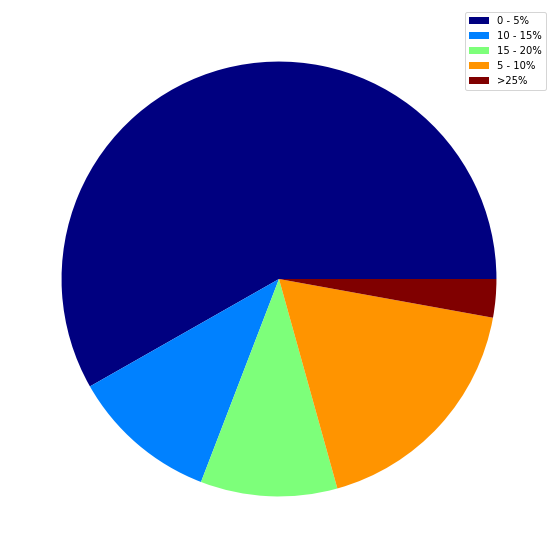

In [737]:
diff_service = user_metadata_geo.groupby('service_category').count()
diff_service.plot.pie(y = 'account_id', figsize = (10,10), cmap = 'jet', labels=None,)
plt.ylabel('')

#  ARRS

In [743]:
user_metadata_geo.columns

Index(['account_id', 'industry high level', 'ARR_total', 'ARR_total.1',
       'High level revenue tier', 'Employee tier', 'first_connection',
       'months', 'relative_month', 'total_users_per_month',
       'new_users_onboarded_on_first_connection_month', 'owner_entity',
       'service_category', 'month_50_decrease', 'connection_plus_new'],
      dtype='object')

In [744]:
type(user_metadata_geo['ARR_total'][0])

numpy.float64

In [851]:
def categorize(x, a):
    for r in a:
        if x < r :
            return int(r)
        if x == max(a):
            return int(max(a))
M = int(max(user_metadata_geo['ARR_total'].unique()))
m = int(min(user_metadata_geo['ARR_total'].unique()))
a = range(int(m), int(M+50000), 50000)
print(a)
user_metadata_geo['ARR Category'] = user_metadata_geo['ARR_total'].apply(lambda x : categorize(x,a ))

range(0, 5127328, 50000)


In [ ]:
user_metadata_geo[['ARR Category', 'ARR_total']]

In [788]:
user_metadata_geo_nn = user_metadata_geo[~user_metadata_geo['ARR Category'].isnull()]

In [771]:
retention_percent(user_metadata_geo_nn, 50, 'ARR Category')

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = 0
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['connection_plus_new'] = 0
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][(df[category]==cat) & (df['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][(df[category]==cat) & (df['first_connection']==start)] = m
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_18255/852356652.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['total_number_starts'][stats[category] == cat] = repartition_by_category['number_of_starts'][repartition_by_category[category] == cat].loc[0]


ARR Category  \
0    5100000.0   
0     200000.0   
0    2000000.0   
0    1250000.0   
0     950000.0   
0     900000.0   
0     150000.0   
0     800000.0   
0     650000.0   
0     550000.0   
1     550000.0   
2     550000.0   
0     500000.0   
1     500000.0   
0     450000.0   
0     400000.0   
1     400000.0   
0     350000.0   
0     300000.0   
0     250000.0   
2     250000.0   
0     100000.0   
0     850000.0   
0      50000.0   
0     750000.0   
0     700000.0   
0     600000.0   
2     600000.0   
0    3300000.0   
0    1150000.0   

                                                                                                                                                                              month_50_decrease  \
0                                                                                            [12.0, 16.0, 30.0, 34.0, 38.0, 84.0, 92.0, 102.0, 114.0, 116.0, 124.0, 182.0, 218.0, 220.0, 282.0]   
0             [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 54.0, 64.0, 74.0, 78.0, 80.0, 110.0]   
0                                                                                                                      [12.0, 14.0, 16.0, 18.0, 20.0, 24.0, 26.0, 28.0, 30.0, 34.0, 36.0, 52.0]   
0                                                                                   [2.0, 6.0, 28.0, 36.0, 38.0, 42.0, 44.0, 46.0, 48.0, 50.0, 54.0, 56.0, 62.0, 66.0, 72.0, 74.0, 76.0, 142.0]   
0                   [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 46.0, 48.0, 56.0, 58.0, 62.0, 68.0, 86.0, 104.0]   
0                                                        [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 40.0, 42.0, 46.0, 50.0, 70.0]   
0  [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 50.0, 52.0, 56.0, 62.0, 68.0, 72.0, 74.0, 80.0, 82.0]   
0                                                                                           [4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 20.0, 22.0, 26.0, 28.0, 32.0, 36.0, 38.0, 46.0, 62.0, 76.0]   
0                                                                                                        [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 62.0]   
0                                                                                      [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 66.0, 80.0]   
1                                                                                                                                                            [2.0, 4.0, 12.0, 14.0, 18.0, 32.0]   
2                                                                                                                                                                  [6.0, 8.0, 12.0, 20.0, 52.0]   
0                                                                          [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 28.0, 30.0, 32.0, 40.0, 42.0, 66.0, 72.0, 74.0]   
1                                                                                                                                                                 [2.0, 10.0, 16.0, 18.0, 48.0]   
0                                                                    [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 32.0, 36.0, 38.0, 46.0, 52.0, 56.0, 72.0]   
0                                                      [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 28.0, 32.0, 34.0, 36.0, 38.0, 42.0, 48.0, 50.0, 80.0, 116.0, 122.0]   
1                                                                                                                               

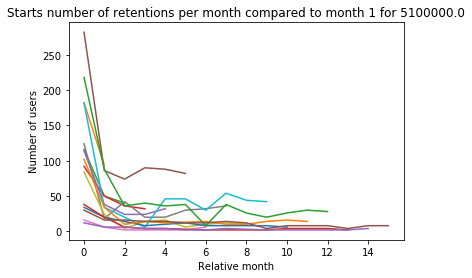

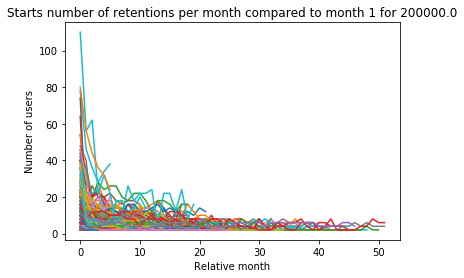

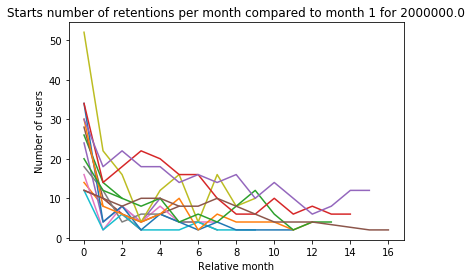

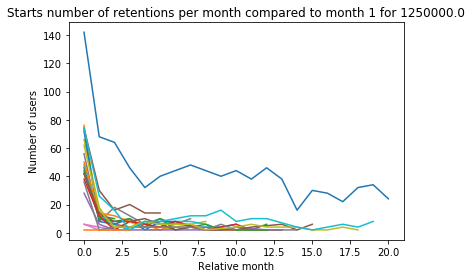

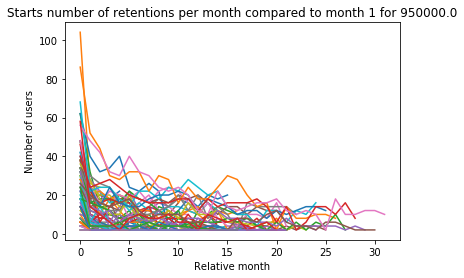

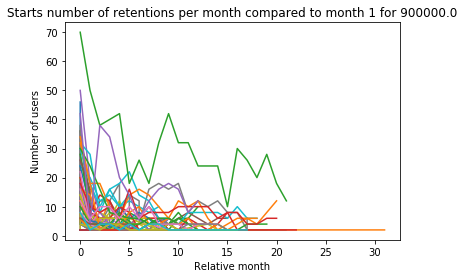

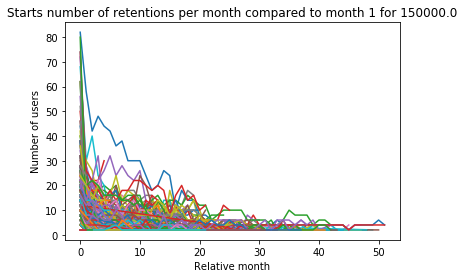

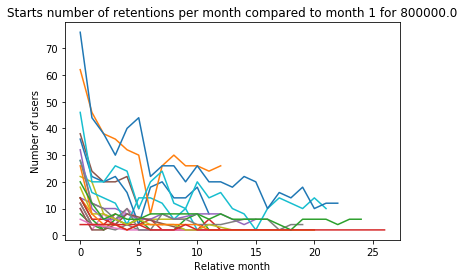

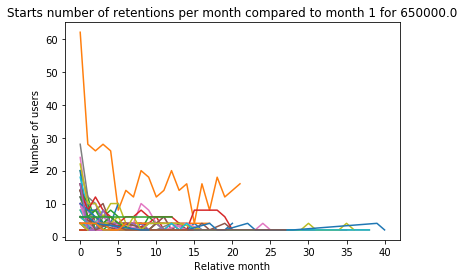

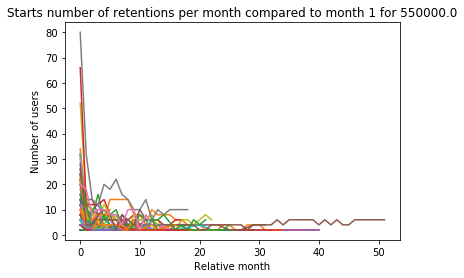

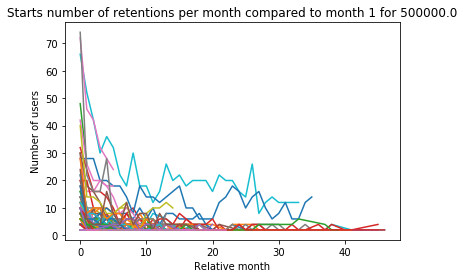

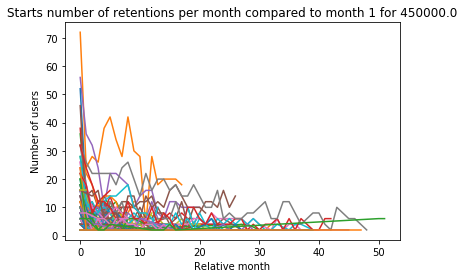

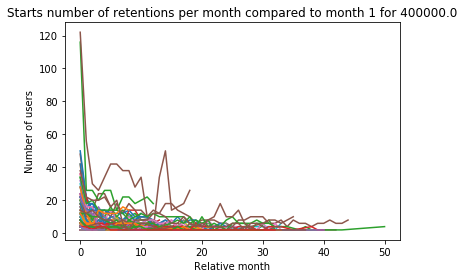

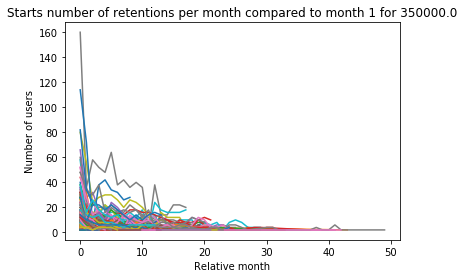

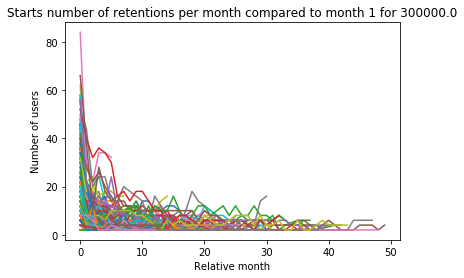

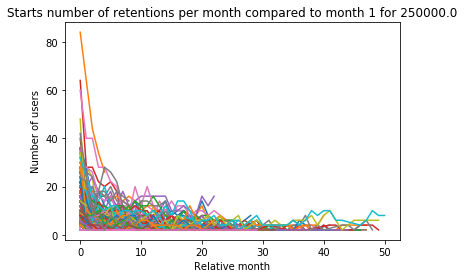

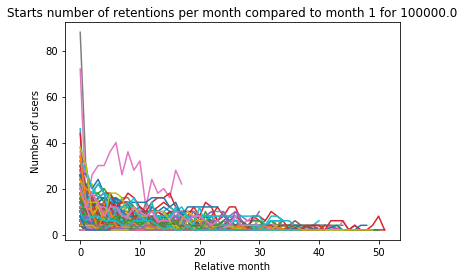

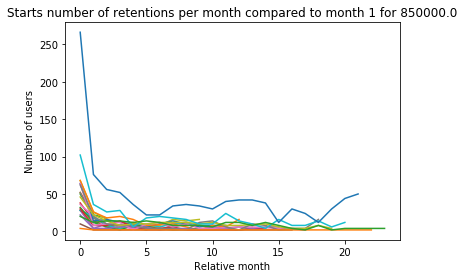

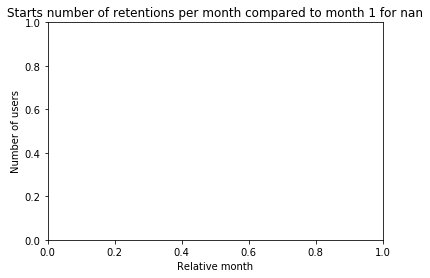

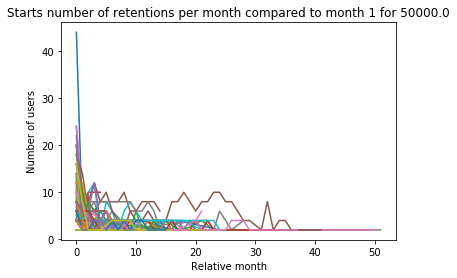

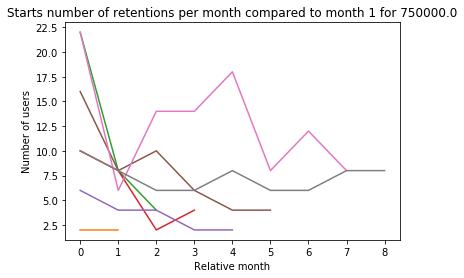

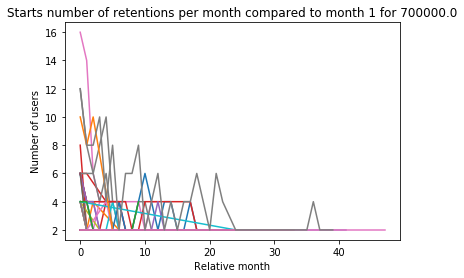

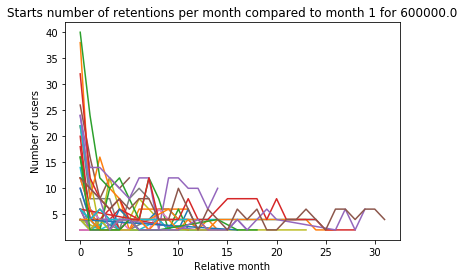

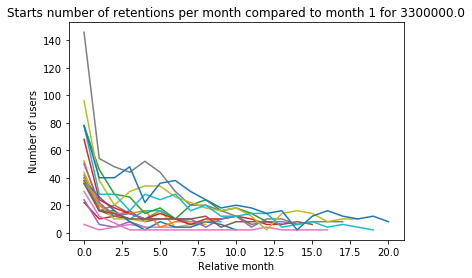

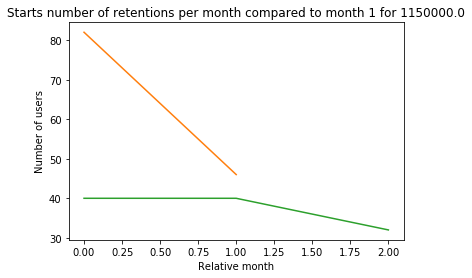

<Figure size 432x288 with 0 Axes>

In [776]:
path = '/Users/sarahlenet/Documents/Candidatures Postes/Digital Marketing Firm/Material for Slides/ARR/'
plot_per_category(user_metadata_geo, 'ARR Category', path)


In [ ]:
#Possible modifications:
- adapt to save fig for ARR in folder

Text(0, 0.5, '')

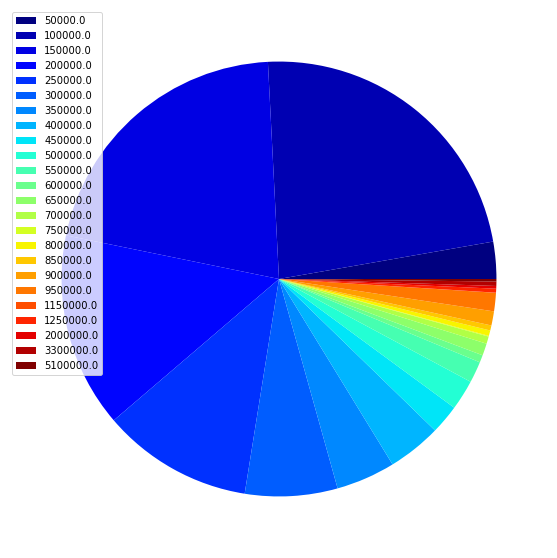

In [789]:
diff_ARR = user_metadata_geo.groupby('ARR Category').count()
diff_ARR.plot.pie(y = 'account_id', figsize = (10,10), cmap = 'jet', labels=None,)
plt.ylabel('')

# Clicktale Portfolio

In [18]:
clicktale_exportfolio

account_id  is_legacy_clicktale_account
0      0012o00002IxBOfAAN                          0.0
1      0012o00002IxDbcAAF                          0.0
2      0012o00002IxE0OAAV                          0.0
3      0012o00002IxE2UAAV                          0.0
4      0012o00002IxF8eAAF                          0.0
5      0012o00002IxFSoAAN                          0.0
6      0012o00002IxFe1AAF                          0.0
7      0012o00002IxFqMAAV                          0.0
8      0012o00002IxFsDAAV                          0.0
9      0012o00002IxFuYAAV                          0.0
10     0012o00002IxFwKAAV                          0.0
11     0012o00002IxFxIAAV                          0.0
12     0012o00002IxFykAAF                          0.0
13     0012o00002IxGGUAA3                          0.0
14     0012o00002IxGSLAA3                          0.0
15     0012o00002IxMP9AAN                          0.0
16     0012o00002IxMSmAAN                          0.0
17     0012o00002IxMnXAAV                          0.0
18     0012o00002IxNACAA3                          0.0
19     0012o00002IxNaoAAF                          0.0
20     0012o00002IxNr1AAF                          0.0
21     0012o00002IxQYiAAN                          0.0
22     0012o00002IxQyCAAV                          0.0
23     0012o00002IxRD3AAN                          0.0
24     0012o00002IxRDNAA3                          0.0
25     0012o00002IxRchAAF                          0.0
26     0012o00002IxRxVAAV                          0.0
27     0012o00002IxSdCAAV                          0.0
28     0012o00002IxTH2AAN                          0.0
29     0012o00002IxUBZAA3                          0.0
30     0012o00002IxUCDAA3                          0.0
31     0012o00002IxUCrAAN                          0.0
32     0012o00002IxZ16AAF                          0.0
33     0012o00002IxbHrAAJ                          0.0
34     0012o00002IxdZkAAJ                          0.0
35     0012o00002Ixel8AAB                          0.0
36     0012o00002IxerzAAB                          0.0
37     0012o00002IxesxAAB                          0.0
38     0012o00002IxfiCAAR                          0.0
39     0012o00002IxgO0AAJ                          0.0
40     0012o00002IxkoJAAR                          0.0
41     0012o00002Ixm4WAAR                          0.0
42     0012o00002IxmOvAAJ                          0.0
43     0012o00002IxmhEAAR                          0.0
44     0012o00002IxnE8AAJ                          0.0
45     0012o00002IxnVxAAJ                          0.0
46     0012o00002IxnicAAB                          0.0
47     0012o00002IxnqRAAR                          0.0
48     0012o00002IxobSAAR                          0.0
49     0012o00002IxogcAAB                          0.0
50     0012o00002IxpwVAAR                          0.0
51     0012o00002IxqEFAAZ                          0.0
52     0012o00002IxqFcAAJ                          0.0
53     0012o00002IxqHxAAJ                          0.0
54     0012o00002IxqKhAAJ                          0.0
55     0012o00002IxqM9AAJ                          0.0
56     0012o00002IxqgiAAB                          0.0
57     0012o00002IxqjSAAR                          0.0
58     0012o00002IxqlOAAR                          0.0
59     0012o00002IxqnFAAR                          0.0
60     0012o00002IxqneAAB                          0.0
61     0012o00002IxqomAAB                          0.0
62     0012o00002IxqowAAB                          0.0
63     0012o00002IxqpLAAR                          0.0
64     0012o00002IxqpkAAB                          0.0
65     0012o00002IxqrvAAB                          0.0
66     0012o00002IxqsAAAR                          0.0
67     0012o00002IxqtSAAR                          0.0
68     0012o00002IxqtXAAR                          0.0
69     0012o00002IxqtcAAB                          0.0
70     0012o00002IxqthAAB                          0.0
71     0012o00002IxqtmAAB                          0.0


In [622]:
clicktale_exportfolio.groupby('is_legacy_clicktale_account').count()

account_id
is_legacy_clicktale_account            
0.0                               29118
1.0                                 378

In [850]:
clicktale_exportfolio['is_legacy_clicktale_account'].unique()
print(type(clicktale_exportfolio['is_legacy_clicktale_account'][0]))
clicktale_exportfolio

<class 'numpy.float64'>


account_id  is_legacy_clicktale_account
0      0012o00002IxBOfAAN                          0.0
1      0012o00002IxDbcAAF                          0.0
2      0012o00002IxE0OAAV                          0.0
3      0012o00002IxE2UAAV                          0.0
4      0012o00002IxF8eAAF                          0.0
...                   ...                          ...
29491  001D000001jmcZCIAY                          0.0
29492  001D000001kowyGIAQ                          0.0
29493  001D000001kqgexIAA                          0.0
29494  001D000001kqgl0IAA                          0.0
29495  001D000001ksed7IAA                          0.0

[29496 rows x 2 columns]